# CSAFE Îç∞Ïù¥ÌÑ∞ÏÖã ÏûëÏÑ±ÏûêÎ≥Ñ Î∂ÑÌè¨ Î∂ÑÏÑù

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ CSAFE ÌïÑÍ∏∞ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïã§Ï†ú ÏûëÏÑ±ÏûêÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Î∂ÑÏÑùÌï©ÎãàÎã§.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from collections import Counter

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 1. CSV Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Í∏∞Î≥∏ ÌÜµÍ≥Ñ
csv_path = "/workspace/MIL/data/raw/naver_ocr.csv"
print(f"CSV ÌååÏùº Í≤ΩÎ°ú: {csv_path}")

# CSV ÌååÏùº Î°úÎìú
df = pd.read_csv(csv_path)
print(f"\nÏ†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò: {len(df):,}")
print(f"Ïª¨Îüº: {df.columns.tolist()}")
print(f"\nÏ≤òÏùå 5Ìñâ:")
print(df.head())

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\nÎùºÎ≤® Î≤îÏúÑ: {df['label'].min()} ~ {df['label'].max()}")
print(f"Í≥†Ïú† ÎùºÎ≤® Ïàò: {df['label'].nunique()}")

CSV ÌååÏùº Í≤ΩÎ°ú: /workspace/MIL/data/raw/naver_ocr.csv

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ìñâ Ïàò: 556,128
Ïª¨Îüº: ['image_path', 'label', 'text']

Ï≤òÏùå 5Ìñâ:
                           image_path  label    text
0   /content/xai_train/0/"Y.X._13.png      0      yx
1    /content/xai_train/0/'YX'_17.png      0      yx
2     /content/xai_train/0/-he_10.png      0      he
3      /content/xai_train/0/-ne_9.png      0      ne
4  /content/xai_train/0/Athens_18.png      0  athens

ÎùºÎ≤® Î≤îÏúÑ: 0 ~ 474
Í≥†Ïú† ÎùºÎ≤® Ïàò: 475


In [2]:
# 2. ÏûëÏÑ±ÏûêÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î∂ÑÏÑù
writer_counts = df['label'].value_counts().sort_index()

# Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäî ÎùºÎ≤® Î≤îÏúÑ ÌôïÏù∏ (0-299)
actual_writers = writer_counts[writer_counts.index < 300]

print(f"\nÏã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÏûëÏÑ±Ïûê (0-299) ÌÜµÍ≥Ñ:")
print(f"ÏûëÏÑ±Ïûê Ïàò: {len(actual_writers)}")
print(f"ÏûëÏÑ±ÏûêÎãπ ÌèâÍ∑† Ïù¥ÎØ∏ÏßÄ Ïàò: {actual_writers.mean():.2f}")
print(f"ÌëúÏ§ÄÌé∏Ï∞®: {actual_writers.std():.2f}")
print(f"ÏµúÏÜå Ïù¥ÎØ∏ÏßÄ Ïàò: {actual_writers.min()}")
print(f"ÏµúÎåÄ Ïù¥ÎØ∏ÏßÄ Ïàò: {actual_writers.max()}")
print(f"Ï§ëÏïôÍ∞í: {actual_writers.median()}")


Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÏûëÏÑ±Ïûê (0-299) ÌÜµÍ≥Ñ:
ÏûëÏÑ±Ïûê Ïàò: 300
ÏûëÏÑ±ÏûêÎãπ ÌèâÍ∑† Ïù¥ÎØ∏ÏßÄ Ïàò: 1171.04
ÌëúÏ§ÄÌé∏Ï∞®: 97.72
ÏµúÏÜå Ïù¥ÎØ∏ÏßÄ Ïàò: 580
ÏµúÎåÄ Ïù¥ÎØ∏ÏßÄ Ïàò: 1385
Ï§ëÏïôÍ∞í: 1200.5


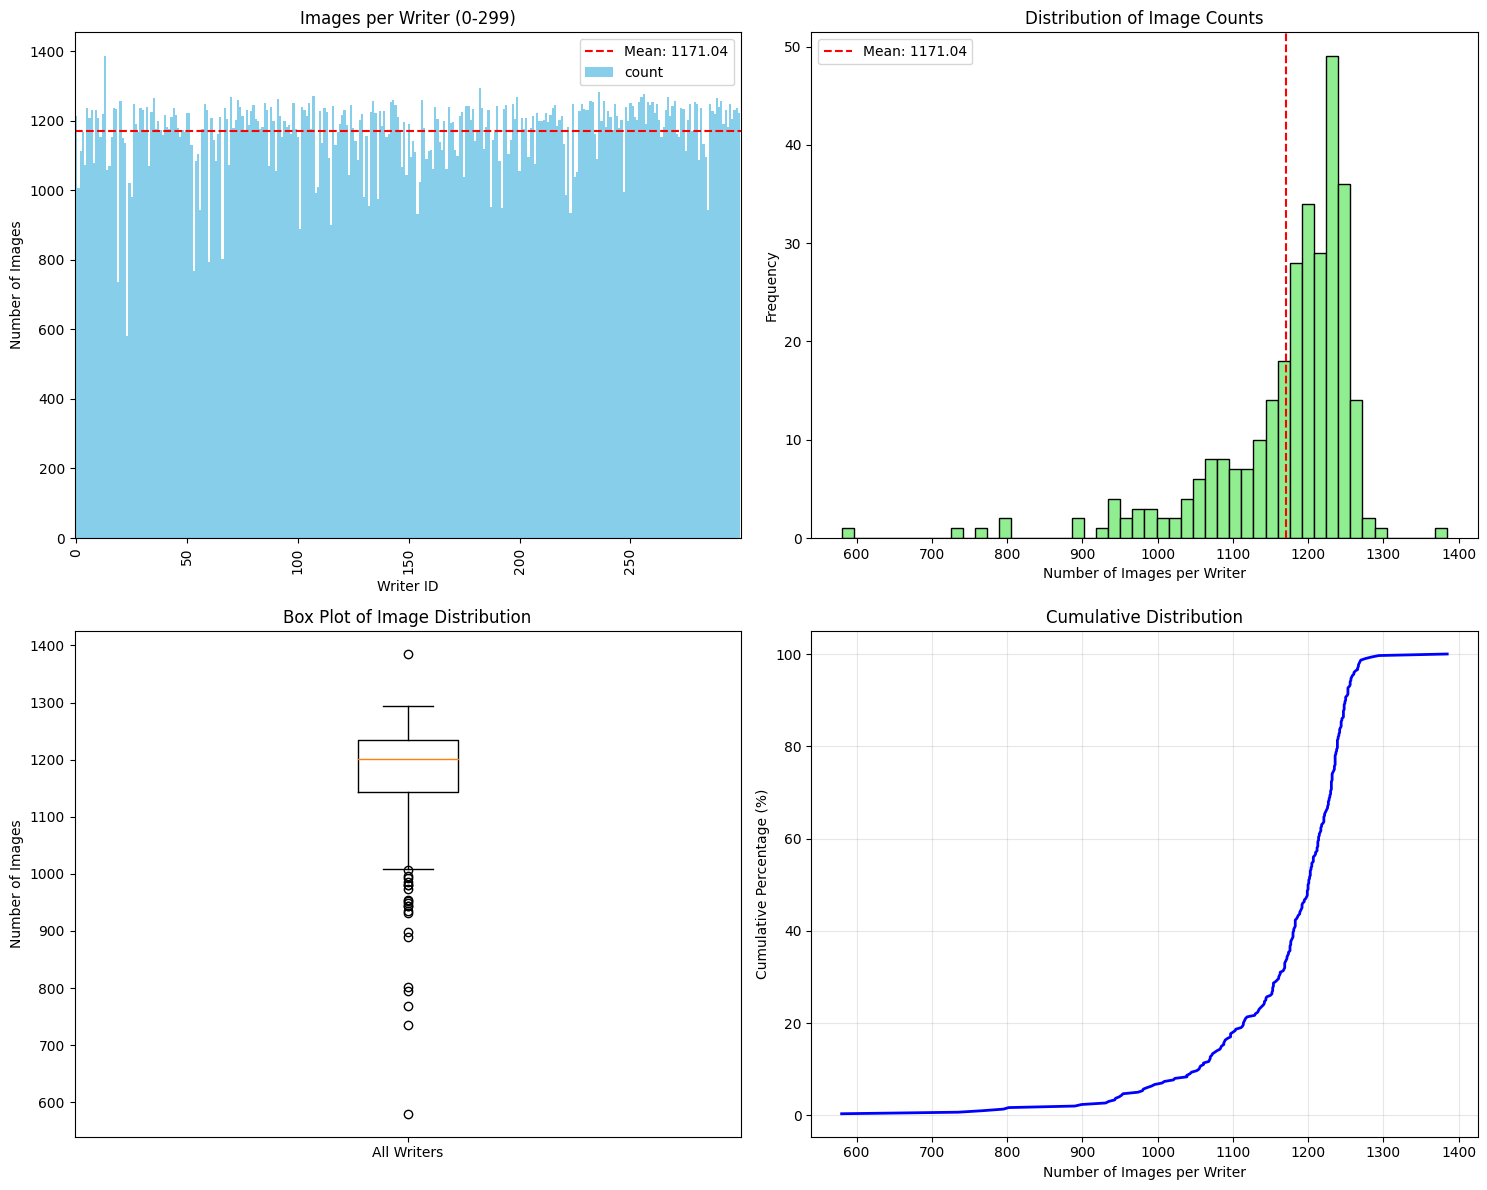


Î∂ÑÌè¨ ÏöîÏïΩ:
Î≥ÄÎèô Í≥ÑÏàò (CV): 8.35%
ÏµúÏÜå-ÏµúÎåÄ Î≤îÏúÑ: 805
Q1 (25%): 1144.0
Q3 (75%): 1235.0
IQR: 91.0


In [3]:
# 3. Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 3-1. ÏûëÏÑ±ÏûêÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò ÎßâÎåÄ Í∑∏ÎûòÌîÑ
ax1 = axes[0, 0]
actual_writers.plot(kind='bar', ax=ax1, color='skyblue', width=1.0)
ax1.set_xlabel('Writer ID')
ax1.set_ylabel('Number of Images')
ax1.set_title('Images per Writer (0-299)')
ax1.set_xticks(range(0, 300, 50))
ax1.axhline(y=actual_writers.mean(), color='red', linestyle='--', label=f'Mean: {actual_writers.mean():.2f}')
ax1.legend()

# 3-2. ÌûàÏä§ÌÜ†Í∑∏Îû®
ax2 = axes[0, 1]
ax2.hist(actual_writers.values, bins=50, color='lightgreen', edgecolor='black')
ax2.set_xlabel('Number of Images per Writer')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Image Counts')
ax2.axvline(x=actual_writers.mean(), color='red', linestyle='--', label=f'Mean: {actual_writers.mean():.2f}')
ax2.legend()

# 3-3. Î∞ïÏä§ÌîåÎ°Ø
ax3 = axes[1, 0]
ax3.boxplot(actual_writers.values, vert=True)
ax3.set_ylabel('Number of Images')
ax3.set_title('Box Plot of Image Distribution')
ax3.set_xticklabels(['All Writers'])

# 3-4. ÎàÑÏ†Å Î∂ÑÌè¨
ax4 = axes[1, 1]
sorted_counts = sorted(actual_writers.values)
cumulative = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts) * 100
ax4.plot(sorted_counts, cumulative, 'b-', linewidth=2)
ax4.set_xlabel('Number of Images per Writer')
ax4.set_ylabel('Cumulative Percentage (%)')
ax4.set_title('Cumulative Distribution')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/workspace/MIL/output/figures/writer_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ÌÜµÍ≥Ñ ÏöîÏïΩ
print(f"\nÎ∂ÑÌè¨ ÏöîÏïΩ:")
print(f"Î≥ÄÎèô Í≥ÑÏàò (CV): {actual_writers.std() / actual_writers.mean() * 100:.2f}%")
print(f"ÏµúÏÜå-ÏµúÎåÄ Î≤îÏúÑ: {actual_writers.max() - actual_writers.min()}")
print(f"Q1 (25%): {actual_writers.quantile(0.25)}")
print(f"Q3 (75%): {actual_writers.quantile(0.75)}")
print(f"IQR: {actual_writers.quantile(0.75) - actual_writers.quantile(0.25)}")

In [4]:
# 5. Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä Í≤ÄÏ¶ù (ÏÉòÌîåÎßÅ)
import random

# Î¨¥ÏûëÏúÑÎ°ú 10Î™ÖÏùò ÏûëÏÑ±Ïûê ÏÑ†ÌÉùÌïòÏó¨ Ïã§Ï†ú ÌååÏùº ÌôïÏù∏
sample_writers = random.sample(list(range(300)), 10)
image_root = "/workspace/MIL/data/raw/csafe_version5_xai_train"

print("\nÏã§Ï†ú ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä Í≤ÄÏ¶ù (10Î™Ö ÏÉòÌîå):")
for writer_id in sorted(sample_writers):
    writer_folder = os.path.join(image_root, str(writer_id))
    if os.path.exists(writer_folder):
        actual_files = len([f for f in os.listdir(writer_folder) if f.endswith('.png')])
        csv_count = len(df[df['label'] == writer_id])
        print(f"  ÏûëÏÑ±Ïûê {writer_id}: CSV={csv_count}Í∞ú, Ïã§Ï†ú ÌååÏùº={actual_files}Í∞ú", end="")
        if csv_count == actual_files:
            print(" ‚úì ÏùºÏπò")
        else:
            print(f" ‚úó Î∂àÏùºÏπò (Ï∞®Ïù¥: {abs(csv_count - actual_files)})")
    else:
        print(f"  ÏûëÏÑ±Ïûê {writer_id}: Ìè¥ÎçîÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå!")


Ïã§Ï†ú ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä Í≤ÄÏ¶ù (10Î™Ö ÏÉòÌîå):
  ÏûëÏÑ±Ïûê 22: CSV=1137Í∞ú, Ïã§Ï†ú ÌååÏùº=1137Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 45: CSV=1216Í∞ú, Ïã§Ï†ú ÌååÏùº=1216Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 66: CSV=802Í∞ú, Ïã§Ï†ú ÌååÏùº=802Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 113: CSV=1225Í∞ú, Ïã§Ï†ú ÌååÏùº=1225Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 178: CSV=1202Í∞ú, Ïã§Ï†ú ÌååÏùº=1202Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 192: CSV=949Í∞ú, Ïã§Ï†ú ÌååÏùº=949Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 226: CSV=1052Í∞ú, Ïã§Ï†ú ÌååÏùº=1052Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 241: CSV=1212Í∞ú, Ïã§Ï†ú ÌååÏùº=1212Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 243: CSV=1247Í∞ú, Ïã§Ï†ú ÌååÏùº=1247Í∞ú ‚úì ÏùºÏπò
  ÏûëÏÑ±Ïûê 284: CSV=1097Í∞ú, Ïã§Ï†ú ÌååÏùº=1097Í∞ú ‚úì ÏùºÏπò


In [5]:
# 7. ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î∂ÑÏÑù Î∞è Í∂åÏû•ÏÇ¨Ìï≠
print("\nÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î∂ÑÏÑù:")

# Gini Í≥ÑÏàò Í≥ÑÏÇ∞ (Î∂àÍ∑†Ìòï Ï†ïÎèÑ Ï∏°Ï†ï)
def gini_coefficient(counts):
    sorted_counts = sorted(counts)
    n = len(counts)
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * sorted_counts)) / (n * np.sum(sorted_counts)) - (n + 1) / n

gini = gini_coefficient(actual_writers.values)
print(f"Gini Í≥ÑÏàò: {gini:.4f} (0=ÏôÑÎ≤ΩÌïú Í∑†Ìòï, 1=ÏôÑÏ†ÑÌïú Î∂àÍ∑†Ìòï)")

# Î∂àÍ∑†Ìòï ÎπÑÏú®
imbalance_ratio = actual_writers.max() / actual_writers.min()
print(f"Î∂àÍ∑†Ìòï ÎπÑÏú® (ÏµúÎåÄ/ÏµúÏÜå): {imbalance_ratio:.2f}")

# Í∂åÏû•ÏÇ¨Ìï≠
print("\nÍ∂åÏû•ÏÇ¨Ìï≠:")
if gini < 0.1:
    print("‚úì Îß§Ïö∞ Í∑†ÌòïÏû°Ìûå Îç∞Ïù¥ÌÑ∞ÏÖãÏûÖÎãàÎã§. Î≥ÑÎèÑÏùò ÌÅ¥ÎûòÏä§ Í∑†Ìòï Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
elif gini < 0.2:
    print("‚úì Ï†ÅÏ†àÌûà Í∑†ÌòïÏû°Ìûå Îç∞Ïù¥ÌÑ∞ÏÖãÏûÖÎãàÎã§. ÏÑ†ÌÉùÏ†ÅÏúºÎ°ú Í∞ÄÏ§ëÏπò Ï°∞Ï†ïÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏäµÎãàÎã§.")
else:
    print("‚ö†Ô∏è ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§. Îã§Ïùå Î∞©Î≤ïÏùÑ Í≥†Î†§ÌïòÏÑ∏Ïöî:")
    print("  - ÌÅ¥ÎûòÏä§Î≥Ñ Í∞ÄÏ§ëÏπò Ï†ÅÏö©")
    print("  - Ïñ∏ÎçîÏÉòÌîåÎßÅ ÎòêÎäî Ïò§Î≤ÑÏÉòÌîåÎßÅ")
    print("  - Focal Loss Îì± Î∂àÍ∑†ÌòïÏóê Í∞ïÍ±¥Ìïú ÏÜêÏã§ Ìï®Ïàò ÏÇ¨Ïö©")

# ÏµúÏ¢Ö ÏöîÏïΩ Î≥¥Í≥†ÏÑú
print("\n=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏöîÏïΩ ===")
print(f"Ï¥ù ÏûëÏÑ±Ïûê Ïàò: {len(actual_writers)}")
print(f"Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò: {actual_writers.sum():,}")
print(f"ÏûëÏÑ±ÏûêÎãπ ÌèâÍ∑†: {actual_writers.mean():.2f} ¬± {actual_writers.std():.2f}")
print(f"Ï§ëÏïôÍ∞í: {actual_writers.median()}")
print(f"ÏµúÏÜå-ÏµúÎåÄ: {actual_writers.min()} - {actual_writers.max()}")
print(f"Î≥ÄÎèôÍ≥ÑÏàò: {actual_writers.std() / actual_writers.mean() * 100:.2f}%")
print(f"Gini Í≥ÑÏàò: {gini:.4f}")

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Ï∂îÏ≤ú
total_writers = len(actual_writers)
train_size = int(total_writers * 0.6)
val_size = int(total_writers * 0.2)
test_size = total_writers - train_size - val_size

print(f"\nÏ∂îÏ≤ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (60:20:20):")
print(f"  Train: 0-{train_size-1} ({train_size}Î™Ö)")
print(f"  Val: {train_size}-{train_size+val_size-1} ({val_size}Î™Ö)")
print(f"  Test: {train_size+val_size}-{total_writers-1} ({test_size}Î™Ö)")


ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î∂ÑÏÑù:
Gini Í≥ÑÏàò: 0.0404 (0=ÏôÑÎ≤ΩÌïú Í∑†Ìòï, 1=ÏôÑÏ†ÑÌïú Î∂àÍ∑†Ìòï)
Î∂àÍ∑†Ìòï ÎπÑÏú® (ÏµúÎåÄ/ÏµúÏÜå): 2.39

Í∂åÏû•ÏÇ¨Ìï≠:
‚úì Îß§Ïö∞ Í∑†ÌòïÏû°Ìûå Îç∞Ïù¥ÌÑ∞ÏÖãÏûÖÎãàÎã§. Î≥ÑÎèÑÏùò ÌÅ¥ÎûòÏä§ Í∑†Ìòï Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌïòÏßÄ ÏïäÏäµÎãàÎã§.

=== ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏöîÏïΩ ===
Ï¥ù ÏûëÏÑ±Ïûê Ïàò: 300
Ï¥ù Ïù¥ÎØ∏ÏßÄ Ïàò: 351,311
ÏûëÏÑ±ÏûêÎãπ ÌèâÍ∑†: 1171.04 ¬± 97.72
Ï§ëÏïôÍ∞í: 1200.5
ÏµúÏÜå-ÏµúÎåÄ: 580 - 1385
Î≥ÄÎèôÍ≥ÑÏàò: 8.35%
Gini Í≥ÑÏàò: 0.0404

Ï∂îÏ≤ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (60:20:20):
  Train: 0-179 (180Î™Ö)
  Val: 180-239 (60Î™Ö)
  Test: 240-299 (60Î™Ö)



Î∞òÎ≥µ(repetition) Î∂ÑÌè¨ Î∂ÑÏÑù:
ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº: ['image_path', 'label', 'text']
image_pathÏóêÏÑú repetition Ï∂îÏ∂ú ÏôÑÎ£å
count    556128.000000
mean         10.945317
std           6.247980
min           1.000000
25%           6.000000
50%          11.000000
75%          15.000000
max          27.000000
Name: repetition, dtype: float64

Î∞òÎ≥µ ÌöüÏàòÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò:
repetition
1     26613
2     26340
3     26296
4     26344
5     26347
6     26232
7     26293
8     26247
9     26371
10    30442
Name: count, dtype: int64


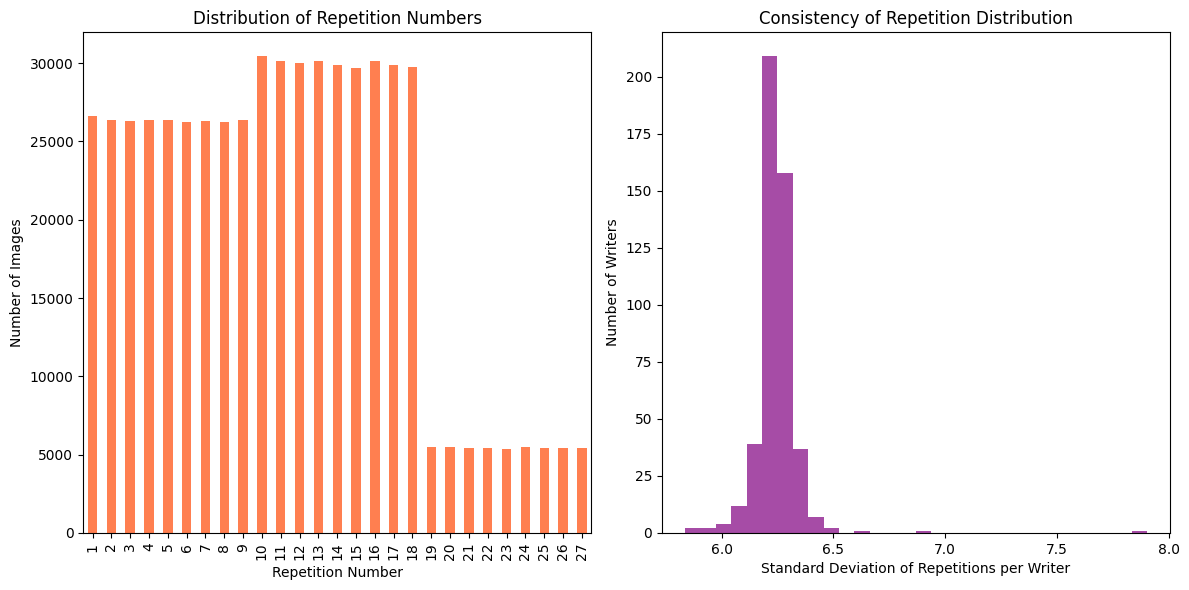

In [6]:
# 6. Î∞òÎ≥µ(repetition) Î∂ÑÌè¨ Î∂ÑÏÑù (Ïª¨ÎüºÎ™Ö ÌôïÏù∏ ÌõÑ Ïã§Ìñâ)
print("\nÎ∞òÎ≥µ(repetition) Î∂ÑÌè¨ Î∂ÑÏÑù:")
print(f"ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ïª¨Îüº: {df.columns.tolist()}")

# repetition Ïª¨ÎüºÏù¥ ÏóÜÏùÑ Í≤ΩÏö∞ ÌååÏùºÎ™ÖÏóêÏÑú Ï∂îÏ∂ú
if 'repetition' not in df.columns:
    # image_pathÏóêÏÑú Î∞òÎ≥µ Î≤àÌò∏ Ï∂îÏ∂ú ÏãúÎèÑ
    df['repetition'] = df['image_path'].str.extract(r'_(\d+)\.png$').astype(int)
    print("image_pathÏóêÏÑú repetition Ï∂îÏ∂ú ÏôÑÎ£å")

if 'repetition' in df.columns:
    rep_stats = df['repetition'].describe()
    print(rep_stats)
    
    # Î∞òÎ≥µ ÌöüÏàòÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò
    rep_counts = df['repetition'].value_counts().sort_index()
    print(f"\nÎ∞òÎ≥µ ÌöüÏàòÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò:")
    print(rep_counts.head(10))  # Ï≤òÏùå 10Í∞úÎßå Ï∂úÎ†•
    
    # Î∞òÎ≥µ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    rep_counts.plot(kind='bar', color='coral')
    plt.xlabel('Repetition Number')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Repetition Numbers')
    
    plt.subplot(1, 2, 2)
    # Í∞Å ÏûëÏÑ±ÏûêÎ≥Ñ Î∞òÎ≥µ ÌöüÏàò Î∂ÑÌè¨Ïùò ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
    writer_rep_std = df.groupby('label')['repetition'].std()
    plt.hist(writer_rep_std.values, bins=30, color='purple', alpha=0.7)
    plt.xlabel('Standard Deviation of Repetitions per Writer')
    plt.ylabel('Number of Writers')
    plt.title('Consistency of Repetition Distribution')
    
    plt.tight_layout()
    plt.savefig('/workspace/MIL/output/figures/repetition_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("repetition Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎúÅÎãàÎã§.")

In [7]:
# 4. Ïù¥ÏÉÅÏπò Î∞è Í∑πÎã®Í∞í Î∂ÑÏÑù
# ÌèâÍ∑†ÏóêÏÑú 2 ÌëúÏ§ÄÌé∏Ï∞® Ïù¥ÏÉÅ Î≤óÏñ¥ÎÇú ÏûëÏÑ±Ïûê Ï∞æÍ∏∞
mean_count = actual_writers.mean()
std_count = actual_writers.std()
outlier_threshold_low = mean_count - 2 * std_count
outlier_threshold_high = mean_count + 2 * std_count

outliers_low = actual_writers[actual_writers < outlier_threshold_low]
outliers_high = actual_writers[actual_writers > outlier_threshold_high]

print("\nÏù¥ÏÉÅÏπò Î∂ÑÏÑù (ÌèâÍ∑† ¬± 2œÉ Í∏∞Ï§Ä):")
print(f"ÌïòÌïú ÏûÑÍ≥ÑÍ∞í: {outlier_threshold_low:.2f}")
print(f"ÏÉÅÌïú ÏûÑÍ≥ÑÍ∞í: {outlier_threshold_high:.2f}")
print(f"\nÏ†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ ÏûëÏÑ±Ïûê (< {outlier_threshold_low:.2f}):")
if len(outliers_low) > 0:
    for writer_id, count in outliers_low.items():
        print(f"  ÏûëÏÑ±Ïûê {writer_id}: {count}Í∞ú Ïù¥ÎØ∏ÏßÄ")
else:
    print("  ÏóÜÏùå")

print(f"\nÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ ÏûëÏÑ±Ïûê (> {outlier_threshold_high:.2f}):")
if len(outliers_high) > 0:
    for writer_id, count in outliers_high.items():
        print(f"  ÏûëÏÑ±Ïûê {writer_id}: {count}Í∞ú Ïù¥ÎØ∏ÏßÄ")
else:
    print("  ÏóÜÏùå")

# ÏÉÅÏúÑ/ÌïòÏúÑ 10Î™Ö ÏûëÏÑ±Ïûê
print("\nÏÉÅÏúÑ 10Î™Ö (Í∞ÄÏû• ÎßéÏùÄ Ïù¥ÎØ∏ÏßÄ):")
for writer_id, count in actual_writers.nlargest(10).items():
    print(f"  ÏûëÏÑ±Ïûê {writer_id}: {count}Í∞ú")

print("\nÌïòÏúÑ 10Î™Ö (Í∞ÄÏû• Ï†ÅÏùÄ Ïù¥ÎØ∏ÏßÄ):")
for writer_id, count in actual_writers.nsmallest(10).items():
    print(f"  ÏûëÏÑ±Ïûê {writer_id}: {count}Í∞ú")


Ïù¥ÏÉÅÏπò Î∂ÑÏÑù (ÌèâÍ∑† ¬± 2œÉ Í∏∞Ï§Ä):
ÌïòÌïú ÏûÑÍ≥ÑÍ∞í: 975.59
ÏÉÅÌïú ÏûÑÍ≥ÑÍ∞í: 1366.49

Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ ÏûëÏÑ±Ïûê (< 975.59):
  ÏûëÏÑ±Ïûê 19: 735Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 23: 580Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 53: 768Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 56: 943Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 60: 795Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 66: 802Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 101: 890Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 115: 899Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 132: 954Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 136: 974Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 154: 931Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 187: 952Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 192: 949Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 223: 935Í∞ú Ïù¥ÎØ∏ÏßÄ
  ÏûëÏÑ±Ïûê 285: 944Í∞ú Ïù¥ÎØ∏ÏßÄ

ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ ÏûëÏÑ±Ïûê (> 1366.49):
  ÏûëÏÑ±Ïûê 13: 1385Í∞ú Ïù¥ÎØ∏ÏßÄ

ÏÉÅÏúÑ 10Î™Ö (Í∞ÄÏû• ÎßéÏùÄ Ïù¥ÎØ∏ÏßÄ):
  ÏûëÏÑ±Ïûê 13: 1385Í∞ú
  ÏûëÏÑ±Ïûê 182: 1294Í∞ú
  ÏûëÏÑ±Ïûê 236: 1284Í∞ú
  ÏûëÏÑ±Ïûê 256: 1276Í∞ú
  ÏûëÏÑ±Ïûê 107: 1270Í∞ú
  ÏûëÏÑ±Ïûê 255: 1269Í∞ú
  ÏûëÏÑ±Ïûê 267: 1268Í∞ú
  ÏûëÏÑ±Ïûê 70: 1267Í∞ú
  ÏûëÏÑ±Ïûê 199: 1267Í∞ú
  Ïû

## Í≥†Í∏â EDA Î∂ÑÏÑù

Îã§Ïùå Îã®Í≥Ñ: ÏµúÏÜå ÌïÑÏöî EDA Î∂ÑÏÑùÏùÑ ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Î∞è Î™®Îç∏ Ï†ÅÏö©ÏÑ± Í≤ÄÏ¶ù

=== ÏÑ∏ÏÖòÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù ===
Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ìå®ÌÑ¥ Î∂ÑÏÑù:
  1: /content/xai_train/0/"Y.X._13.png
  2: /content/xai_train/0/'YX'_17.png
  3: /content/xai_train/0/-he_10.png
  4: /content/xai_train/0/-ne_9.png
  5: /content/xai_train/0/Athens_18.png
  6: /content/xai_train/0/Athens_11.png
  7: /content/xai_train/0/Athens,_10.png
  8: /content/xai_train/0/Athens,_13.png
  9: /content/xai_train/0/Atmens_17.png
  10: /content/xai_train/0/Atnens ,_16.png

‚úì ÏÑ±Í≥µÌïú Ìå®ÌÑ¥: /(\d+)/ (556,128Í∞ú Ï∂îÏ∂ú)

ÏÑ∏ÏÖò ÌÜµÍ≥Ñ:
count      556128.0
mean     237.556928
std      136.375158
min             0.0
25%           120.0
50%           239.0
75%           355.0
max           474.0
Name: session, dtype: Float64

ÏÑ∏ÏÖòÎ≥Ñ ÏûëÏÑ±Ïûê Îç∞Ïù¥ÌÑ∞ Îß§Ìä∏Î¶≠Ïä§: (300, 300)
ÏÑ∏ÏÖò Ïàò: 300
ÏûëÏÑ±Ïûê Ïàò: 300


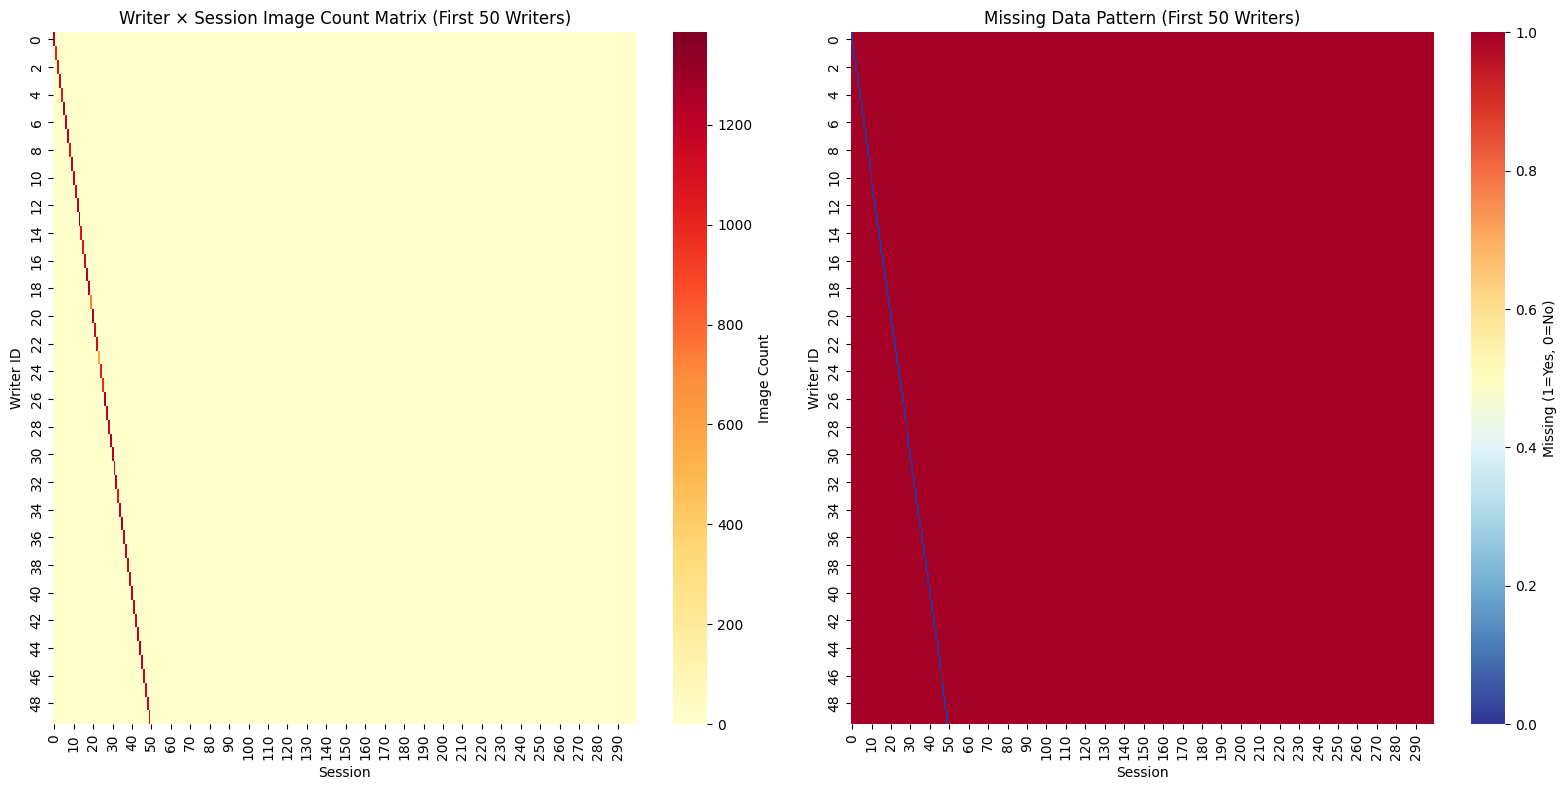


Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù:
Ï†ÑÏ≤¥ ÏÖÄ Ïàò: 90,000
Îπà ÏÖÄ Ïàò: 89,700
ÏôÑÏÑ±ÎèÑ: 0.33%

ÏÑ∏ÏÖòÎ≥Ñ Ï∞∏Ïó¨ ÏûëÏÑ±Ïûê Ïàò:
  ÏÑ∏ÏÖò 0: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 1: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 2: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 3: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 4: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 5: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 6: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 7: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 8: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 9: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 10: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 11: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 12: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 13: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 14: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 15: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 16: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 17: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 18: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 19: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 20: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 21: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 22: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 23: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 24: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 25: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 26: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 27: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 28: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 29: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 30: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 31: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 32: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 33: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 34: 1Î™Ö (0.3%)
  ÏÑ∏ÏÖò 35: 

In [8]:
# 8. ÏÑ∏ÏÖòÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ïπ¥Ïö¥Ìä∏ ÌÖåÏù¥Î∏î ÏÉùÏÑ± Î∞è Í≤∞Ï∏°Ïπò ÌûàÌä∏Îßµ
print("=== ÏÑ∏ÏÖòÎ≥Ñ Îç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù ===")

# Í≤ΩÎ°úÏóêÏÑú ÏÑ∏ÏÖò Ï†ïÎ≥¥ Ï∂îÏ∂ú ÏãúÎèÑ (Ïó¨Îü¨ Ìå®ÌÑ¥ ÏãúÎèÑ)
print("Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ìå®ÌÑ¥ Î∂ÑÏÑù:")
sample_paths = df['image_path'].head(10).tolist()
for i, path in enumerate(sample_paths):
    print(f"  {i+1}: {path}")

# ÏÑ∏ÏÖò Ï∂îÏ∂ú Ìå®ÌÑ¥ ÏãúÎèÑ
session_patterns = [
    r'_(\d+)/',     # _Ïà´Ïûê/ Ìå®ÌÑ¥
    r'/(\d+)/',     # /Ïà´Ïûê/ Ìå®ÌÑ¥  
    r'session_?(\d+)', # sessionÏà´Ïûê Ìå®ÌÑ¥
    r'ses(\d+)',    # sesÏà´Ïûê Ìå®ÌÑ¥
]

df['session'] = None
extracted_pattern = None

for pattern in session_patterns:
    try:
        sessions = df['image_path'].str.extract(pattern)[0]
        non_null_count = sessions.dropna().shape[0]
        if non_null_count > 0:
            df['session'] = sessions.astype('Int64')
            extracted_pattern = pattern
            print(f"\n‚úì ÏÑ±Í≥µÌïú Ìå®ÌÑ¥: {pattern} ({non_null_count:,}Í∞ú Ï∂îÏ∂ú)")
            break
    except:
        continue

if extracted_pattern is None:
    print("\n‚ö†Ô∏è ÏÑ∏ÏÖò Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌï† Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°ú Íµ¨Ï°∞Î•º ÌôïÏù∏ÌïòÏÑ∏Ïöî.")
    # ÎåÄÏïà: ÌååÏùºÎ™ÖÏùò ÎßàÏßÄÎßâ Ïà´ÏûêÎ•º repetitionÏúºÎ°ú ÏÇ¨Ïö©
    print("ÎåÄÏïà: ÌååÏùºÎ™ÖÏóêÏÑú ÎßàÏßÄÎßâ Ïà´ÏûêÎ•º ÏÑ∏ÏÖòÏúºÎ°ú Í∞ÄÏ†ï")
    df['session'] = df['image_path'].str.extract(r'_(\d+)\.png$')[0].astype('Int64')
    extracted_sessions = df['session'].dropna().shape[0]
    print(f"Ï∂îÏ∂úÎêú ÏÑ∏ÏÖò Ï†ïÎ≥¥: {extracted_sessions:,}Í∞ú")

if 'session' in df.columns and df['session'].dropna().shape[0] > 0:
    # ÏÑ∏ÏÖò ÌÜµÍ≥Ñ
    session_stats = df['session'].describe()
    print(f"\nÏÑ∏ÏÖò ÌÜµÍ≥Ñ:")
    print(session_stats)
    
    # ÏûëÏÑ±Ïûê √ó ÏÑ∏ÏÖò ÌîºÎ≤ó ÌÖåÏù¥Î∏î ÏÉùÏÑ± (0-299 ÏûëÏÑ±ÏûêÎßå)
    df_filtered = df[df['label'] < 300].copy()
    
    if len(df_filtered) > 0:
        # ÌîºÎ≤ó ÌÖåÏù¥Î∏î: ÏûëÏÑ±Ïûê(Ìñâ) √ó ÏÑ∏ÏÖò(Ïó¥) ‚Üí Ïù¥ÎØ∏ÏßÄ Í∞úÏàò
        session_pivot = df_filtered.pivot_table(
            index='label', 
            columns='session', 
            values='image_path', 
            aggfunc='count', 
            fill_value=0
        )
        
        print(f"\nÏÑ∏ÏÖòÎ≥Ñ ÏûëÏÑ±Ïûê Îç∞Ïù¥ÌÑ∞ Îß§Ìä∏Î¶≠Ïä§: {session_pivot.shape}")
        print(f"ÏÑ∏ÏÖò Ïàò: {session_pivot.shape[1]}")
        print(f"ÏûëÏÑ±Ïûê Ïàò: {session_pivot.shape[0]}")
        
        # Í≤∞Ï∏°Ïπò ÌûàÌä∏Îßµ ÏÉùÏÑ±
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        
        # ÏôºÏ™Ω: ÏÑ∏ÏÖòÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ïàò ÌûàÌä∏Îßµ
        ax1 = axes[0]
        sns.heatmap(session_pivot.iloc[:50, :], # Ï≤òÏùå 50Î™ÖÎßå ÌëúÏãú
                   cmap='YlOrRd', 
                   ax=ax1,
                   cbar_kws={'label': 'Image Count'})
        ax1.set_title('Writer √ó Session Image Count Matrix (First 50 Writers)')
        ax1.set_xlabel('Session')
        ax1.set_ylabel('Writer ID')
        
        # Ïò§Î•∏Ï™Ω: Í≤∞Ï∏°Ïπò(0Ïù∏ ÏÖÄ) ÌûàÌä∏Îßµ
        ax2 = axes[1]
        missing_matrix = (session_pivot == 0).astype(int)
        sns.heatmap(missing_matrix.iloc[:50, :], # Ï≤òÏùå 50Î™ÖÎßå ÌëúÏãú
                   cmap='RdYlBu_r',
                   ax=ax2,
                   cbar_kws={'label': 'Missing (1=Yes, 0=No)'})
        ax2.set_title('Missing Data Pattern (First 50 Writers)')
        ax2.set_xlabel('Session')
        ax2.set_ylabel('Writer ID')
        
        plt.tight_layout()
        plt.savefig('/workspace/MIL/output/figures/session_completeness_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # ÏôÑÏÑ±ÎèÑ ÌÜµÍ≥Ñ
        total_cells = session_pivot.size
        zero_cells = (session_pivot == 0).sum().sum()
        completion_rate = (total_cells - zero_cells) / total_cells * 100
        
        print(f"\nÎç∞Ïù¥ÌÑ∞ ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù:")
        print(f"Ï†ÑÏ≤¥ ÏÖÄ Ïàò: {total_cells:,}")
        print(f"Îπà ÏÖÄ Ïàò: {zero_cells:,}")
        print(f"ÏôÑÏÑ±ÎèÑ: {completion_rate:.2f}%")
        
        # ÏÑ∏ÏÖòÎ≥Ñ Ï∞∏Ïó¨ ÏûëÏÑ±Ïûê Ïàò
        session_participation = (session_pivot > 0).sum()
        print(f"\nÏÑ∏ÏÖòÎ≥Ñ Ï∞∏Ïó¨ ÏûëÏÑ±Ïûê Ïàò:")
        for session, count in session_participation.items():
            print(f"  ÏÑ∏ÏÖò {session}: {count}Î™Ö ({count/len(session_pivot)*100:.1f}%)")
            
        # ÏûëÏÑ±ÏûêÎ≥Ñ Ï∞∏Ïó¨ ÏÑ∏ÏÖò Ïàò
        writer_participation = (session_pivot > 0).sum(axis=1)
        print(f"\nÏûëÏÑ±ÏûêÎ≥Ñ Ï∞∏Ïó¨ ÏÑ∏ÏÖò ÌÜµÍ≥Ñ:")
        print(f"ÌèâÍ∑† Ï∞∏Ïó¨ ÏÑ∏ÏÖò: {writer_participation.mean():.2f}")
        print(f"ÏµúÏÜå Ï∞∏Ïó¨ ÏÑ∏ÏÖò: {writer_participation.min()}")
        print(f"ÏµúÎåÄ Ï∞∏Ïó¨ ÏÑ∏ÏÖò: {writer_participation.max()}")
        print(f"Î™®Îì† ÏÑ∏ÏÖò Ï∞∏Ïó¨ ÏûëÏÑ±Ïûê: {(writer_participation == session_pivot.shape[1]).sum()}Î™Ö")
else:
    print("ÏÑ∏ÏÖò Ï†ïÎ≥¥ Ï∂îÏ∂ú Ïã§Ìå® - Îã§Ïùå Î∂ÑÏÑùÏúºÎ°ú ÎÑòÏñ¥Í∞ëÎãàÎã§.")

=== ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù ===
ÌèâÍ∑† ÌÖçÏä§Ìä∏ Í∏∏Ïù¥: 4.55
ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Ï§ëÏïôÍ∞í: 4.00
ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞®: 1.97
ÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Gini Í≥ÑÏàò ÌèâÍ∑†: 0.240
Gini Í≥ÑÏàòÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 5Î™Ö ÏûëÏÑ±Ïûê: [267, 283, 187, 221, 25]
ÌèâÍ∑† Í∏∏Ïù¥ ÏÑ†Ìò∏ÎèÑ Î∂ÑÌè¨:
  ÏßßÏùÄ Îã®Ïñ¥ ÏÑ†Ìò∏ (ÌèâÍ∑† < 5Ïûê): 283Î™Ö
  Ï§ëÍ∞Ñ Í∏∏Ïù¥ ÏÑ†Ìò∏ (5-8Ïûê): 17Î™Ö
  Í∏¥ Îã®Ïñ¥ ÏÑ†Ìò∏ (ÌèâÍ∑† > 8Ïûê): 0Î™Ö

Î¨∏Ïûê Ïú†Ìòï ÏÇ¨Ïö© Ìå®ÌÑ¥:
ÌèâÍ∑† ÏïåÌååÎ≤≥ ÏÇ¨Ïö©: 4.56Í∞ú
ÌèâÍ∑† Ïà´Ïûê ÏÇ¨Ïö©: 0.00Í∞ú
ÌèâÍ∑† ÌäπÏàòÎ¨∏Ïûê ÏÇ¨Ïö©: 0.00Í∞ú
ÌèâÍ∑† ÎåÄÎ¨∏Ïûê ÎπÑÏú®: 0.000

Îã®Ïñ¥ Îã§ÏñëÏÑ± Î∂ÑÏÑù:
ÌèâÍ∑† Îã®Ïñ¥ Îã§ÏñëÏÑ± ÎπÑÏú®: 0.384
Í∞ÄÏû• Îã§ÏñëÌïú Îã®Ïñ¥ ÏÇ¨Ïö© ÏûëÏÑ±Ïûê ÏÉÅÏúÑ 5Î™Ö: [187, 25, 1, 53, 283]
Î∞òÎ≥µ Îã®Ïñ¥ ÏÇ¨Ïö©Ïù¥ ÎßéÏùÄ ÏûëÏÑ±Ïûê ÏÉÅÏúÑ 5Î™Ö: [190, 233, 298, 299, 88]


/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_5585/1104025717.py:101

/tmp/ipykernel_5585/1104025717.py:102: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.savefig('/workspace/MIL/output/figures/text_analysis.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_5585/1104025717.py:102: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.savefig('/workspace/MIL/output/figures/text_analysis.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_5585/1104025717.py:102: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  plt.savefig('/workspace/MIL/output/figures/text_analysis.png', dpi=300, bbox_inches='tight')
/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig

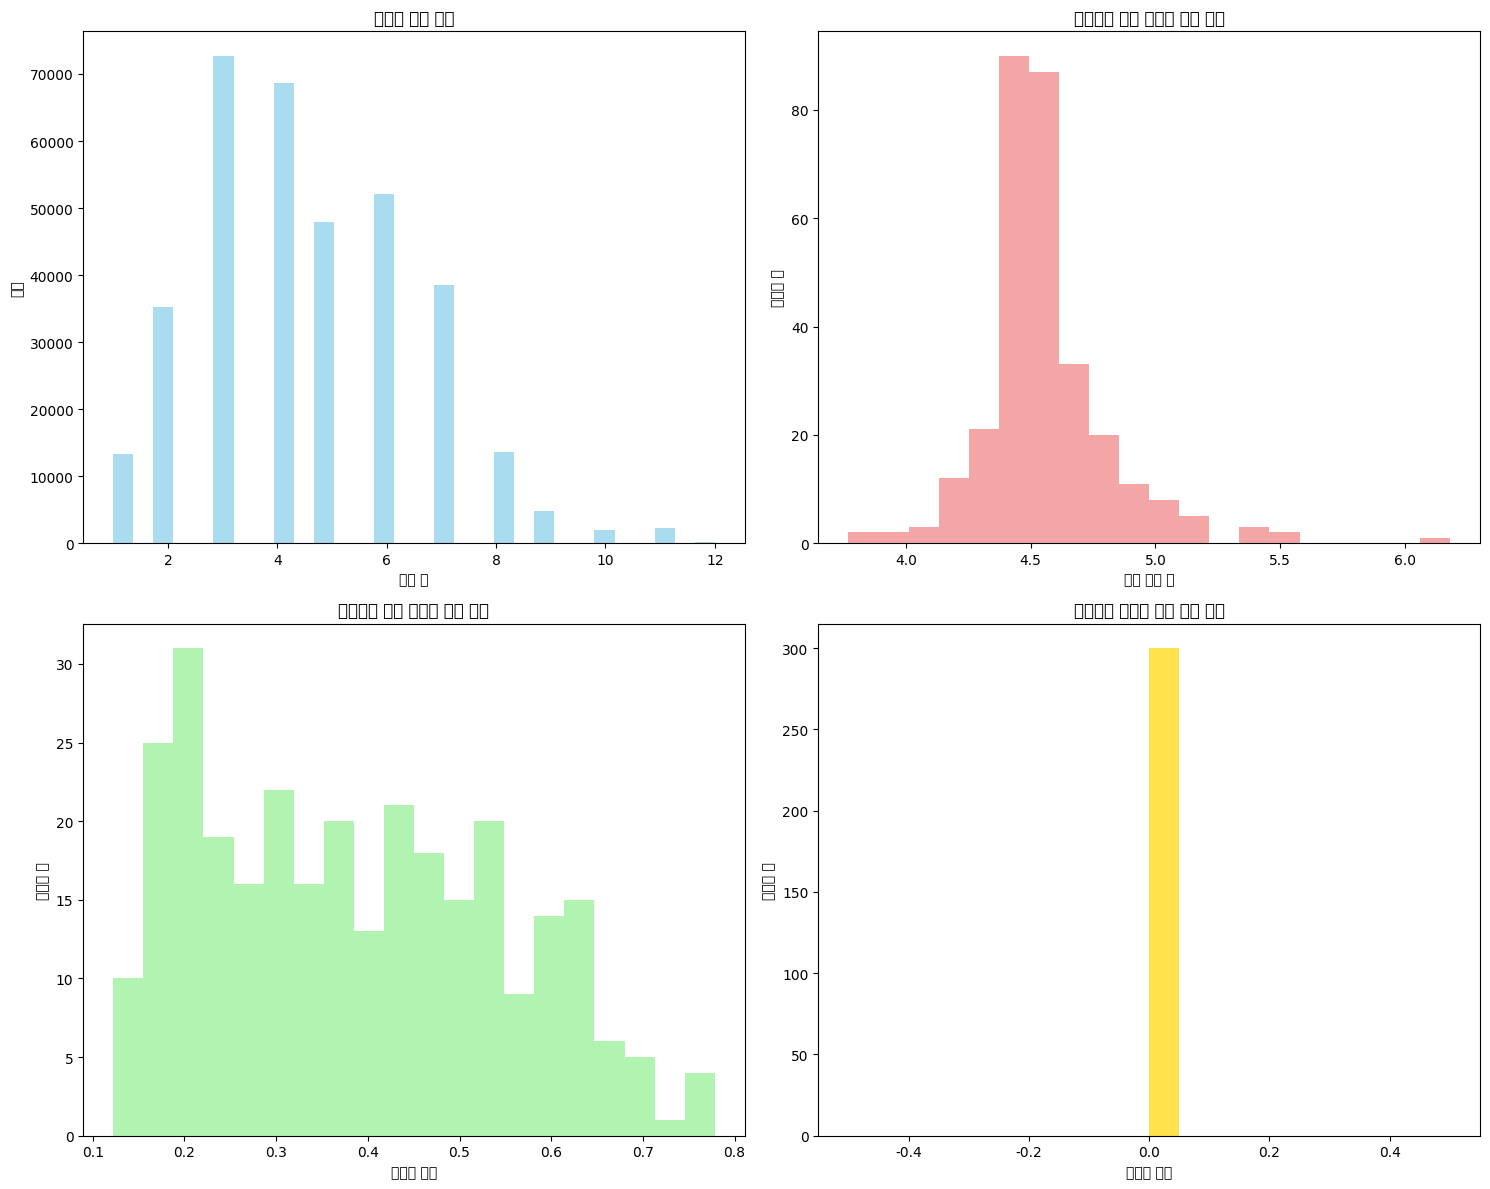


=== ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ===
Í∑πÎã®Ï†ÅÏúºÎ°ú ÏßßÏùÄ ÌÖçÏä§Ìä∏ ÏûëÏÑ±Ïûê (0Î™Ö): []
Í∑πÎã®Ï†ÅÏúºÎ°ú Í∏¥ ÌÖçÏä§Ìä∏ ÏûëÏÑ±Ïûê (0Î™Ö): []
Îã®Ïñ¥ Îã§ÏñëÏÑ±Ïù¥ ÎÇÆÏùÄ ÏûëÏÑ±Ïûê (111Î™Ö): [5, 6, 12, 13, 17, 18, 26, 30, 32, 38, 43, 50, 51, 58, 59, 69, 70, 71, 73, 75, 76, 79, 80, 81, 84, 85, 88, 91, 98, 104, 105, 106, 110, 116, 118, 121, 131, 133, 134, 135, 137, 138, 139, 142, 143, 144, 145, 148, 150, 156, 157, 162, 166, 168, 174, 176, 177, 178, 179, 180, 185, 186, 190, 193, 196, 205, 206, 208, 212, 214, 216, 218, 220, 222, 224, 228, 229, 230, 231, 232, 233, 234, 238, 240, 241, 242, 243, 246, 248, 249, 254, 255, 258, 259, 261, 262, 268, 270, 273, 276, 277, 279, 280, 282, 287, 288, 289, 295, 296, 298, 299]
Îã®Ïñ¥ Îã§ÏñëÏÑ±Ïù¥ ÎÜíÏùÄ ÏûëÏÑ±Ïûê (0Î™Ö): []
ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù ÏôÑÎ£å


In [9]:
# Cell 10: ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù
print("=== ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù ===")

# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∞è ÌäπÏÑ± Ïª¨Îüº Ï∂îÍ∞Ä
df_text_analysis = df_filtered.copy()
df_text_analysis['text_length'] = df_text_analysis['text'].str.len()
df_text_analysis['alphabets'] = df_text_analysis['text'].str.count(r'[a-zA-Z]')
df_text_analysis['digits'] = df_text_analysis['text'].str.count(r'[0-9]')
df_text_analysis['special_chars'] = df_text_analysis['text'].str.count(r'[^a-zA-Z0-9]')
df_text_analysis['uppercase_ratio'] = df_text_analysis['text'].str.count(r'[A-Z]') / df_text_analysis['text_length']

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"ÌèâÍ∑† ÌÖçÏä§Ìä∏ Í∏∏Ïù¥: {df_text_analysis['text_length'].mean():.2f}")
print(f"ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Ï§ëÏïôÍ∞í: {df_text_analysis['text_length'].median():.2f}")
print(f"ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞®: {df_text_analysis['text_length'].std():.2f}")

# 1. ÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ Î∂àÍ∑†Îì± Ï†ïÎèÑ (Gini Í≥ÑÏàò)
try:
    def calculate_gini(x):
        n = len(x)
        x_sorted = np.sort(x)
        cumsum = np.cumsum(x_sorted)
        return (n + 1 - 2 * sum(cumsum) / cumsum[-1]) / n
    
    writer_length_gini = df_text_analysis.groupby('label')['text_length'].apply(calculate_gini)
    print(f"ÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Gini Í≥ÑÏàò ÌèâÍ∑†: {writer_length_gini.mean():.3f}")
    print(f"Gini Í≥ÑÏàòÍ∞Ä ÎÜíÏùÄ ÏÉÅÏúÑ 5Î™Ö ÏûëÏÑ±Ïûê: {writer_length_gini.nlargest(5).index.tolist()}")
except:
    print("Gini Í≥ÑÏàò Í≥ÑÏÇ∞ Ïã§Ìå®")

# 2. ÏûëÏÑ±ÏûêÎ≥Ñ Í∏∏Ïù¥ ÏÑ†Ìò∏ÎèÑ Î∂ÑÏÑù (mode Ìï®Ïàò ÏàòÏ†ï)
def safe_mode(series):
    """ÏïàÏ†ÑÌïú mode Í≥ÑÏÇ∞ Ìï®Ïàò"""
    try:
        mode_result = series.mode()
        return mode_result.iloc[0] if len(mode_result) > 0 else series.median()
    except:
        return series.median()

writer_length_stats = df_text_analysis.groupby('label')['text_length'].agg([
    'mean', 
    'median',
    safe_mode
]).round(2)
writer_length_stats.columns = ['mean_length', 'median_length', 'mode_length']

# ÏûëÏÑ±ÏûêÎ≥Ñ ÏÑ†Ìò∏ Í∏∏Ïù¥ Î∂ÑÌè¨
print(f"ÌèâÍ∑† Í∏∏Ïù¥ ÏÑ†Ìò∏ÎèÑ Î∂ÑÌè¨:")
print(f"  ÏßßÏùÄ Îã®Ïñ¥ ÏÑ†Ìò∏ (ÌèâÍ∑† < 5Ïûê): {(writer_length_stats['mean_length'] < 5).sum()}Î™Ö")
print(f"  Ï§ëÍ∞Ñ Í∏∏Ïù¥ ÏÑ†Ìò∏ (5-8Ïûê): {((writer_length_stats['mean_length'] >= 5) & (writer_length_stats['mean_length'] <= 8)).sum()}Î™Ö")
print(f"  Í∏¥ Îã®Ïñ¥ ÏÑ†Ìò∏ (ÌèâÍ∑† > 8Ïûê): {(writer_length_stats['mean_length'] > 8).sum()}Î™Ö")

# 3. Î¨∏Ïûê Ïú†ÌòïÎ≥Ñ Î∂ÑÏÑù
char_type_analysis = df_text_analysis.groupby('label')[['alphabets', 'digits', 'special_chars', 'uppercase_ratio']].mean()

print(f"\nÎ¨∏Ïûê Ïú†Ìòï ÏÇ¨Ïö© Ìå®ÌÑ¥:")
print(f"ÌèâÍ∑† ÏïåÌååÎ≤≥ ÏÇ¨Ïö©: {char_type_analysis['alphabets'].mean():.2f}Í∞ú")
print(f"ÌèâÍ∑† Ïà´Ïûê ÏÇ¨Ïö©: {char_type_analysis['digits'].mean():.2f}Í∞ú")
print(f"ÌèâÍ∑† ÌäπÏàòÎ¨∏Ïûê ÏÇ¨Ïö©: {char_type_analysis['special_chars'].mean():.2f}Í∞ú")
print(f"ÌèâÍ∑† ÎåÄÎ¨∏Ïûê ÎπÑÏú®: {char_type_analysis['uppercase_ratio'].mean():.3f}")

# 4. Îã®Ïñ¥ Îã§ÏñëÏÑ± Î∂ÑÏÑù
word_diversity = df_text_analysis.groupby('label')['text'].agg([
    'nunique',  # Í≥†Ïú† Îã®Ïñ¥ Ïàò
    'count'     # Ï¥ù Îã®Ïñ¥ Ïàò
])
word_diversity['diversity_ratio'] = word_diversity['nunique'] / word_diversity['count']

print(f"\nÎã®Ïñ¥ Îã§ÏñëÏÑ± Î∂ÑÏÑù:")
print(f"ÌèâÍ∑† Îã®Ïñ¥ Îã§ÏñëÏÑ± ÎπÑÏú®: {word_diversity['diversity_ratio'].mean():.3f}")
print(f"Í∞ÄÏû• Îã§ÏñëÌïú Îã®Ïñ¥ ÏÇ¨Ïö© ÏûëÏÑ±Ïûê ÏÉÅÏúÑ 5Î™Ö: {word_diversity['diversity_ratio'].nlargest(5).index.tolist()}")
print(f"Î∞òÎ≥µ Îã®Ïñ¥ ÏÇ¨Ïö©Ïù¥ ÎßéÏùÄ ÏûëÏÑ±Ïûê ÏÉÅÏúÑ 5Î™Ö: {word_diversity['diversity_ratio'].nsmallest(5).index.tolist()}")

# 5. ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨
axes[0,0].hist(df_text_analysis['text_length'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨')
axes[0,0].set_xlabel('Î¨∏Ïûê Ïàò')
axes[0,0].set_ylabel('ÎπàÎèÑ')

# ÏûëÏÑ±ÏûêÎ≥Ñ ÌèâÍ∑† Í∏∏Ïù¥ Î∂ÑÌè¨
axes[0,1].hist(writer_length_stats['mean_length'], bins=20, alpha=0.7, color='lightcoral')
axes[0,1].set_title('ÏûëÏÑ±ÏûêÎ≥Ñ ÌèâÍ∑† ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨')
axes[0,1].set_xlabel('ÌèâÍ∑† Î¨∏Ïûê Ïàò')
axes[0,1].set_ylabel('ÏûëÏÑ±Ïûê Ïàò')

# Îã®Ïñ¥ Îã§ÏñëÏÑ± Î∂ÑÌè¨
axes[1,0].hist(word_diversity['diversity_ratio'], bins=20, alpha=0.7, color='lightgreen')
axes[1,0].set_title('ÏûëÏÑ±ÏûêÎ≥Ñ Îã®Ïñ¥ Îã§ÏñëÏÑ± ÎπÑÏú® Î∂ÑÌè¨')
axes[1,0].set_xlabel('Îã§ÏñëÏÑ± ÎπÑÏú®')
axes[1,0].set_ylabel('ÏûëÏÑ±Ïûê Ïàò')

# ÎåÄÎ¨∏Ïûê ÏÇ¨Ïö© ÎπÑÏú® Î∂ÑÌè¨
axes[1,1].hist(char_type_analysis['uppercase_ratio'], bins=20, alpha=0.7, color='gold')
axes[1,1].set_title('ÏûëÏÑ±ÏûêÎ≥Ñ ÎåÄÎ¨∏Ïûê ÏÇ¨Ïö© ÎπÑÏú® Î∂ÑÌè¨')
axes[1,1].set_xlabel('ÎåÄÎ¨∏Ïûê ÎπÑÏú®')
axes[1,1].set_ylabel('ÏûëÏÑ±Ïûê Ïàò')

plt.tight_layout()
plt.savefig('/workspace/MIL/output/figures/text_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
print(f"\n=== ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ïù¥ÏÉÅÏπò ÌÉêÏßÄ ===")

# Í∑πÎã®Ï†ÅÏúºÎ°ú Í∏¥/ÏßßÏùÄ ÌÖçÏä§Ìä∏ ÏûëÏÑ±Ïûê
very_short_writers = writer_length_stats[writer_length_stats['mean_length'] < 3].index.tolist()
very_long_writers = writer_length_stats[writer_length_stats['mean_length'] > 10].index.tolist()

print(f"Í∑πÎã®Ï†ÅÏúºÎ°ú ÏßßÏùÄ ÌÖçÏä§Ìä∏ ÏûëÏÑ±Ïûê ({len(very_short_writers)}Î™Ö): {very_short_writers}")
print(f"Í∑πÎã®Ï†ÅÏúºÎ°ú Í∏¥ ÌÖçÏä§Ìä∏ ÏûëÏÑ±Ïûê ({len(very_long_writers)}Î™Ö): {very_long_writers}")

# Îã®Ïñ¥ Îã§ÏñëÏÑ±Ïù¥ Í∑πÎã®Ï†ÅÏù∏ ÏûëÏÑ±Ïûê
low_diversity_writers = word_diversity[word_diversity['diversity_ratio'] < 0.3].index.tolist()
high_diversity_writers = word_diversity[word_diversity['diversity_ratio'] > 0.9].index.tolist()

print(f"Îã®Ïñ¥ Îã§ÏñëÏÑ±Ïù¥ ÎÇÆÏùÄ ÏûëÏÑ±Ïûê ({len(low_diversity_writers)}Î™Ö): {low_diversity_writers}")
print(f"Îã®Ïñ¥ Îã§ÏñëÏÑ±Ïù¥ ÎÜíÏùÄ ÏûëÏÑ±Ïûê ({len(high_diversity_writers)}Î™Ö): {high_diversity_writers}")

print("ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù ÏôÑÎ£å")

=== OCR ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù ===
ÌÖçÏä§Ìä∏ Î∂ÑÏÑù ÎåÄÏÉÅ: 351,311Í∞ú ÏÉòÌîå

ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:
count    351311.000000
mean          4.545343
std           1.969097
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          12.000000
Name: text_length, dtype: float64

ÌÖçÏä§Ìä∏ ÎÇ¥Ïö© ÏÉòÌîå (Í∏∏Ïù¥Ïàú):
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê   0): 'switzeerland'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê   1): 'subbubyahood'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê  10): 'swottzelland'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 101): 'novenderator'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 101): 'struitanthen'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 101): 'addistribtto'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 108): 'colonelparry'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 108): 'addiesseding'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 108): 'shewaswalkin'
  Í∏∏Ïù¥ 12 (ÏûëÏÑ±Ïûê 108): 'whickedaivay'


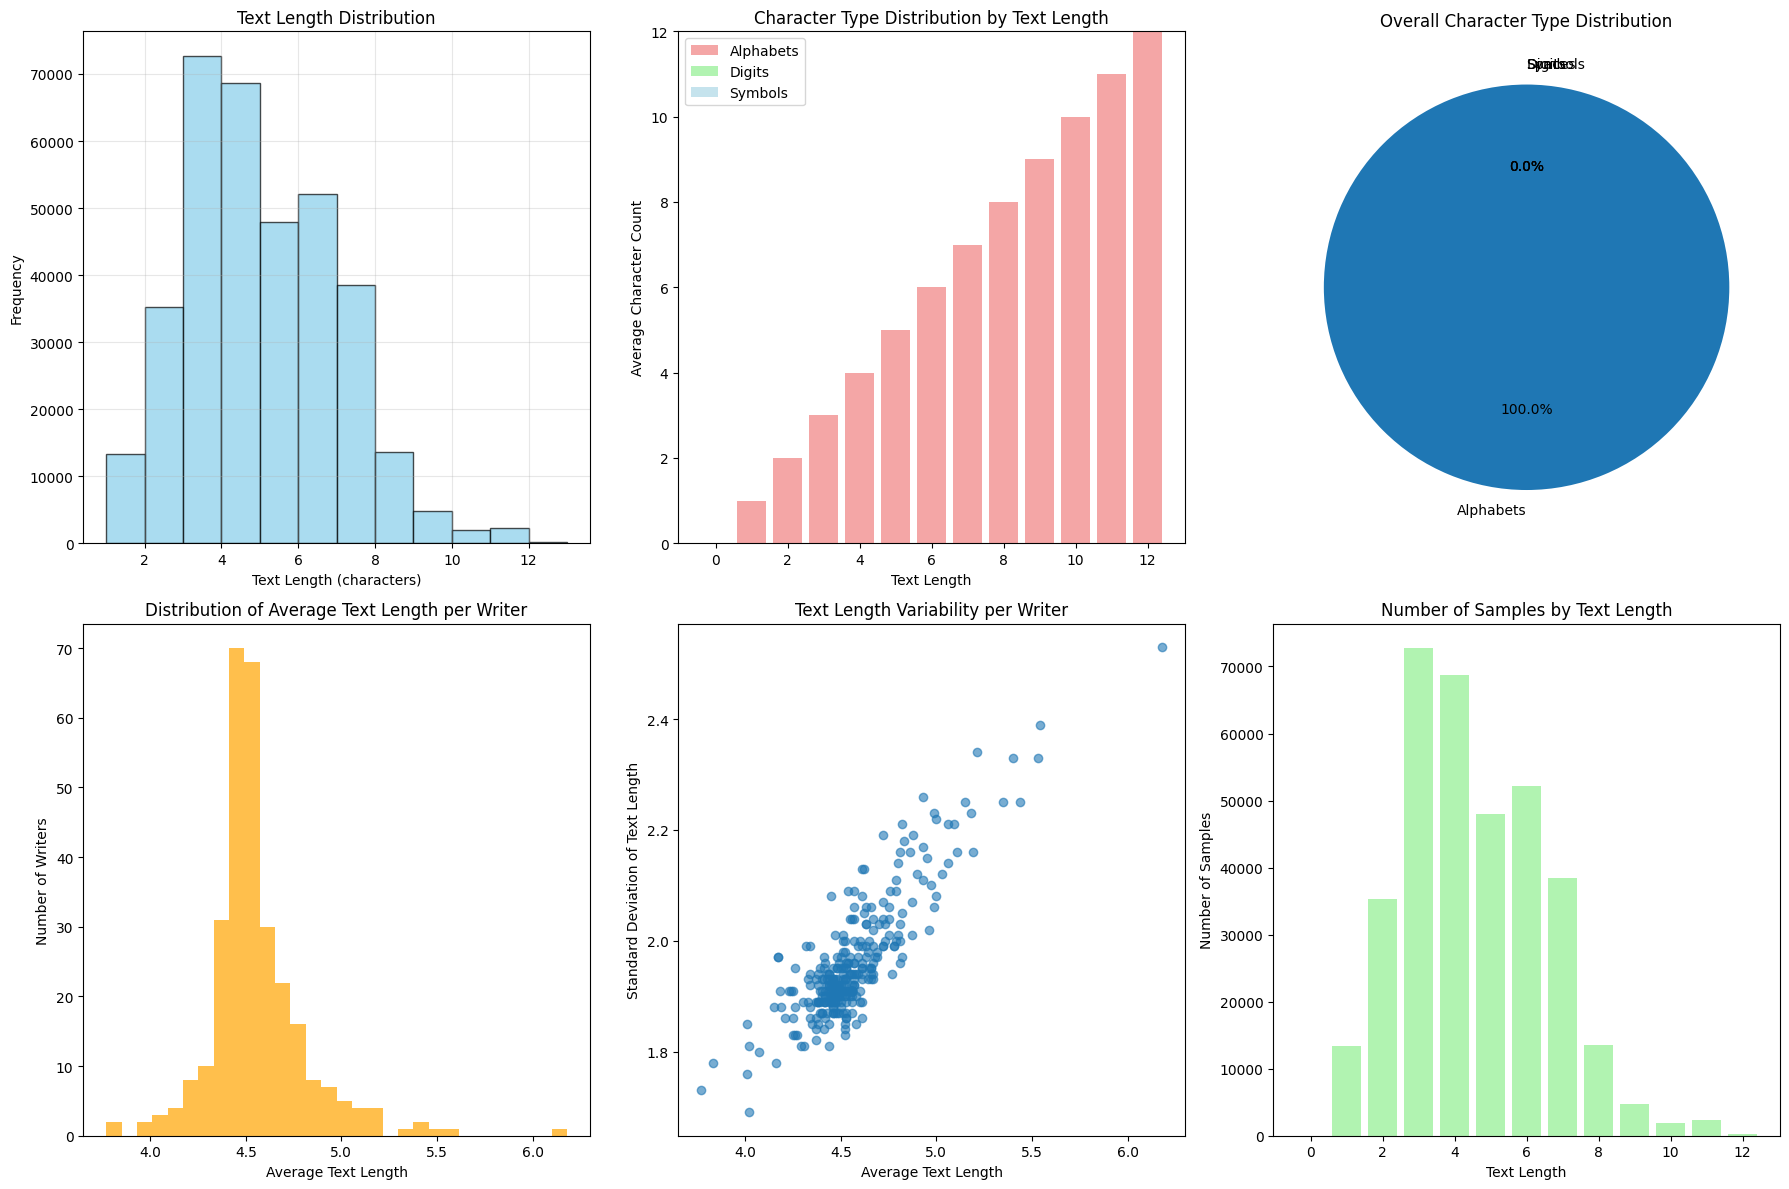


ÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ìé∏Ìñ•ÏÑ± Î∂ÑÏÑù:
ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄ ÏûëÏÑ±Ïûê: 0Î™Ö

ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Î≥Ñ Î∂ÑÌè¨:
  Í∏∏Ïù¥  0:     2Í∞ú ÏÉòÌîå,   2Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  1: 13331Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  2: 35274Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  3: 72723Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  4: 68688Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  5: 47961Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  6: 52109Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  7: 38470Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  8: 13567Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥  9:  4773Í∞ú ÏÉòÌîå, 300Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥ 10:  1939Í∞ú ÏÉòÌîå, 266Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥ 11:  2291Í∞ú ÏÉòÌîå, 294Î™Ö ÏûëÏÑ±Ïûê
  Í∏∏Ïù¥ 12:   183Í∞ú ÏÉòÌîå,  99Î™Ö ÏûëÏÑ±Ïûê

Ìé∏Ìñ•ÏÑ± Î∂ÑÏÑù Í≤∞Í≥º:
ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Gini Í≥ÑÏàò: 0.5281

ÏûëÏÑ±ÏûêÎ≥Ñ ÏÑ†Ìò∏ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥:
  Í∏∏Ïù¥ 3: 226Î™Ö ÏûëÏÑ±Ïûê (75.3%)
  Í∏∏Ïù¥ 4: 70Î™Ö ÏûëÏÑ±Ïûê (23.3%)
  Í∏∏Ïù¥ 6: 2Î™Ö ÏûëÏÑ±Ïûê (0.7%)
  Í∏∏Ïù¥ 7: 1Î™Ö ÏûëÏÑ±Ïûê (0.3%)
  Í∏∏Ïù¥ 5: 1Î™

In [10]:
# 10. OCR Îã®Ïñ¥/Î¨∏Ïûê Ïú†Ìòï ÎπàÎèÑÎ∂ÑÏÑù
print("=== OCR ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù ===")

import re

# ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù Ìï®Ïàò
def analyze_text_characteristics(text):
    """ÌÖçÏä§Ìä∏Ïùò Î¨∏Ïûê Ïú†ÌòïÎ≥Ñ Î∂ÑÏÑù"""
    if pd.isna(text):
        return 0, 0, 0, 0, 0
        
    text = str(text).lower()
    
    # Î¨∏Ïûê Ïú†ÌòïÎ≥Ñ Ïπ¥Ïö¥Ìä∏
    alphabets = len(re.findall(r'[a-z]', text))
    digits = len(re.findall(r'[0-9]', text))
    symbols = len(re.findall(r'[^a-z0-9\s]', text))
    spaces = len(re.findall(r'\s', text))
    total_length = len(text)
    
    return total_length, alphabets, digits, symbols, spaces

# ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù (0-299 ÏûëÏÑ±ÏûêÎßå)
df_text_analysis = df[df['label'] < 300].copy()
print(f"ÌÖçÏä§Ìä∏ Î∂ÑÏÑù ÎåÄÏÉÅ: {len(df_text_analysis):,}Í∞ú ÏÉòÌîå")

# ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ï∂îÏ∂ú
text_features = df_text_analysis['text'].apply(analyze_text_characteristics)
df_text_analysis[['text_length', 'alphabets', 'digits', 'symbols', 'spaces']] = pd.DataFrame(
    text_features.tolist(), index=df_text_analysis.index)

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print("\nÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ:")
length_stats = df_text_analysis['text_length'].describe()
print(length_stats)

print(f"\nÌÖçÏä§Ìä∏ ÎÇ¥Ïö© ÏÉòÌîå (Í∏∏Ïù¥Ïàú):")
sample_texts = df_text_analysis.nlargest(10, 'text_length')[['text', 'text_length', 'label']]
for idx, row in sample_texts.iterrows():
    print(f"  Í∏∏Ïù¥ {row['text_length']:2d} (ÏûëÏÑ±Ïûê {row['label']:3d}): '{row['text']}'")

# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ Î∂ÑÏÑù
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0, 0].hist(df_text_analysis['text_length'], bins=range(1, max(df_text_analysis['text_length'])+2), 
               alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Text Length Distribution')
axes[0, 0].set_xlabel('Text Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Î¨∏Ïûê Ïú†ÌòïÎ≥Ñ Î∂ÑÌè¨ (Ïä§ÌÉù Î∞î)
length_groups = df_text_analysis.groupby('text_length').agg({
    'alphabets': 'mean',
    'digits': 'mean', 
    'symbols': 'mean'
}).reset_index()

if len(length_groups) > 0:
    x = length_groups['text_length']
    axes[0, 1].bar(x, length_groups['alphabets'], label='Alphabets', alpha=0.7, color='lightcoral')
    axes[0, 1].bar(x, length_groups['digits'], bottom=length_groups['alphabets'], 
                  label='Digits', alpha=0.7, color='lightgreen')
    axes[0, 1].bar(x, length_groups['symbols'], 
                  bottom=length_groups['alphabets'] + length_groups['digits'],
                  label='Symbols', alpha=0.7, color='lightblue')
    axes[0, 1].set_title('Character Type Distribution by Text Length')
    axes[0, 1].set_xlabel('Text Length')
    axes[0, 1].set_ylabel('Average Character Count')
    axes[0, 1].legend()

# 3. Î¨∏Ïûê Ïú†Ìòï ÎπÑÏú® ÌååÏù¥Ï∞®Ìä∏
total_chars = df_text_analysis[['alphabets', 'digits', 'symbols', 'spaces']].sum()
axes[0, 2].pie(total_chars, labels=['Alphabets', 'Digits', 'Symbols', 'Spaces'], 
              autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Overall Character Type Distribution')

# 4. ÏûëÏÑ±ÏûêÎ≥Ñ ÌèâÍ∑† ÌÖçÏä§Ìä∏ Í∏∏Ïù¥
writer_text_stats = df_text_analysis.groupby('label').agg({
    'text_length': ['mean', 'std', 'count'],
    'alphabets': 'mean',
    'digits': 'mean', 
    'symbols': 'mean'
}).round(2)

writer_text_stats.columns = ['avg_length', 'std_length', 'count', 'avg_alphabets', 'avg_digits', 'avg_symbols']

# ÌèâÍ∑† ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨
axes[1, 0].hist(writer_text_stats['avg_length'], bins=30, alpha=0.7, color='orange')
axes[1, 0].set_title('Distribution of Average Text Length per Writer')
axes[1, 0].set_xlabel('Average Text Length')
axes[1, 0].set_ylabel('Number of Writers')

# 5. ÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î≥ÄÎèôÏÑ±
axes[1, 1].scatter(writer_text_stats['avg_length'], writer_text_stats['std_length'], alpha=0.6)
axes[1, 1].set_title('Text Length Variability per Writer')
axes[1, 1].set_xlabel('Average Text Length')
axes[1, 1].set_ylabel('Standard Deviation of Text Length')

# 6. Í∏ÄÏûê ÏàòÎ≥Ñ ÏûëÏÑ±Ïûê Ïàò
length_writer_count = df_text_analysis['text_length'].value_counts().sort_index()
axes[1, 2].bar(length_writer_count.index, length_writer_count.values, alpha=0.7, color='lightgreen')
axes[1, 2].set_title('Number of Samples by Text Length')
axes[1, 2].set_xlabel('Text Length')
axes[1, 2].set_ylabel('Number of Samples')

plt.tight_layout()
plt.savefig('/workspace/MIL/output/figures/text_characteristics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ìé∏Ìñ•ÏÑ± Î∂ÑÏÑù
print("\nÏûëÏÑ±ÏûêÎ≥Ñ ÌÖçÏä§Ìä∏ ÌäπÏÑ± Ìé∏Ìñ•ÏÑ± Î∂ÑÏÑù:")

# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Ìé∏Ìñ•ÏÑ± (CV > 0.5Ïù∏ ÏûëÏÑ±Ïûê)
high_variance_writers = writer_text_stats[
    (writer_text_stats['std_length'] / writer_text_stats['avg_length'] > 0.5) & 
    (writer_text_stats['count'] >= 10)
]

print(f"ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄ ÏûëÏÑ±Ïûê: {len(high_variance_writers)}Î™Ö")
if len(high_variance_writers) > 0:
    print("ÏÉÅÏúÑ 10Î™Ö:")
    top_variance = high_variance_writers.nlargest(10, 'std_length')
    for writer_id, stats in top_variance.iterrows():
        cv = stats['std_length'] / stats['avg_length']
        print(f"  ÏûëÏÑ±Ïûê {writer_id}: ÌèâÍ∑† {stats['avg_length']:.1f} ¬± {stats['std_length']:.1f} (CV: {cv:.2f})")

# Í∏∏Ïù¥Î≥Ñ ÏûëÏÑ±Ïûê Î∂ÑÌè¨ Î∂àÍ∑†Ìòï Î∂ÑÏÑù
length_distribution = df_text_analysis.groupby(['text_length', 'label']).size().unstack(fill_value=0)
print(f"\nÌÖçÏä§Ìä∏ Í∏∏Ïù¥Î≥Ñ Î∂ÑÌè¨:")

for length in sorted(df_text_analysis['text_length'].unique()):
    writer_count = (length_distribution.loc[length] > 0).sum() if length in length_distribution.index else 0
    total_samples = df_text_analysis[df_text_analysis['text_length'] == length].shape[0]
    print(f"  Í∏∏Ïù¥ {length:2d}: {total_samples:5d}Í∞ú ÏÉòÌîå, {writer_count:3d}Î™Ö ÏûëÏÑ±Ïûê")

# Ìé∏Ìñ•ÏÑ± Î∂ÑÏÑù Î∞è Í∂åÏû•ÏÇ¨Ìï≠
print("\nÌé∏Ìñ•ÏÑ± Î∂ÑÏÑù Í≤∞Í≥º:")

# 1. Í∏∏Ïù¥ Ìé∏Ìñ•ÏÑ±
length_gini = None
try:
    length_counts = df_text_analysis['text_length'].value_counts()
    from collections import Counter
    def gini_coefficient(counts):
        sorted_counts = sorted(counts)
        n = len(counts)
        index = np.arange(1, n + 1)
        return (2 * np.sum(index * sorted_counts)) / (n * np.sum(sorted_counts)) - (n + 1) / n
    
    length_gini = gini_coefficient(length_counts.values)
    print(f"ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Gini Í≥ÑÏàò: {length_gini:.4f}")
except:
    print("Gini Í≥ÑÏàò Í≥ÑÏÇ∞ Ïã§Ìå®")

# 2. ÏûëÏÑ±ÏûêÎ≥Ñ Í∏∏Ïù¥ ÏÑ†Ìò∏ÎèÑ Î∂ÑÏÑù (mode ÎåÄÏã† median ÏÇ¨Ïö©)
writer_length_preference = df_text_analysis.groupby('label')['text_length'].agg(['mean', 'median']).round(2)
writer_length_preference.columns = ['mean_length', 'median_length']

# ÏûëÏÑ±ÏûêÎ≥Ñ Í∞ÄÏû• ÏûêÏ£º ÎÇòÏò§Îäî Í∏∏Ïù¥ Í≥ÑÏÇ∞ (mode ÎåÄÏ≤¥)
writer_mode_lengths = {}
for label in df_text_analysis['label'].unique():
    writer_texts = df_text_analysis[df_text_analysis['label'] == label]['text_length']
    mode_length = writer_texts.value_counts().idxmax() if len(writer_texts) > 0 else writer_texts.median()
    writer_mode_lengths[label] = mode_length

writer_length_preference['preferred_length'] = pd.Series(writer_mode_lengths)

# ÏûëÏÑ±ÏûêÎ≥Ñ ÏÑ†Ìò∏ Í∏∏Ïù¥ Î∂ÑÌè¨
preferred_length_dist = writer_length_preference['preferred_length'].value_counts()
print(f"\nÏûëÏÑ±ÏûêÎ≥Ñ ÏÑ†Ìò∏ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥:")
for length, count in preferred_length_dist.head(10).items():
    print(f"  Í∏∏Ïù¥ {length}: {count}Î™Ö ÏûëÏÑ±Ïûê ({count/len(writer_length_preference)*100:.1f}%)")

# Í∂åÏû•ÏÇ¨Ìï≠
print(f"\nÍ∂åÏû•ÏÇ¨Ìï≠:")
if length_gini and length_gini > 0.5:
    print("‚ö†Ô∏è ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨Í∞Ä Îß§Ïö∞ Î∂àÍ∑†Îì±Ìï®")
    print("  ‚Üí 'Í∏∏Ïù¥ Í∑†Îì± ÏúàÎèÑÏö∞' ÌïÑÌÑ∞ÎßÅ Í∂åÏû•")
    print("  ‚Üí Í∏∏Ïù¥Î≥Ñ ÏÉòÌîåÎßÅ ÎòêÎäî Í∞ÄÏ§ëÏπò Ï†ÅÏö© Í≥†Î†§")
elif length_gini and length_gini > 0.3:
    print("‚ö†Ô∏è ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨Í∞Ä Îã§ÏÜå Î∂àÍ∑†Îì±Ìï®")
    print("  ‚Üí ÏÑ†ÌÉùÏ†Å Í∏∏Ïù¥ Í∑†Îì±Ìôî Í≥†Î†§")
else:
    print("‚úì ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨Í∞Ä ÎπÑÍµêÏ†Å Í∑†Îì±Ìï®")

# ÌäπÏ†ï Í∏∏Ïù¥Ïóê Ìé∏Ï§ëÎêú ÏûëÏÑ±Ïûê ÌÉêÏßÄ
for target_length in [1, 2, 3, 4, 5]:  # ÏßßÏùÄ ÌÖçÏä§Ìä∏ Ï≤¥ÌÅ¨
    length_samples = df_text_analysis[df_text_analysis['text_length'] == target_length]
    if len(length_samples) > 0:
        writer_counts = length_samples['label'].value_counts()
        dominant_writers = writer_counts[writer_counts > writer_counts.quantile(0.9)]
        if len(dominant_writers) > 0:
            print(f"\nÍ∏∏Ïù¥ {target_length} ÌäπÌôî ÏûëÏÑ±Ïûê:")
            for writer_id, count in dominant_writers.head(5).items():
                total_by_writer = df_text_analysis[df_text_analysis['label'] == writer_id].shape[0] 
                ratio = count / total_by_writer * 100
                print(f"  ÏûëÏÑ±Ïûê {writer_id}: {count}/{total_by_writer} ({ratio:.1f}%)")

=== Repetition Ï†ïÌï©ÏÑ± Í≤ÄÏ¶ù ===
Repetition Ï∂îÏ∂ú ÏÉÅÌÉú ÌôïÏù∏:
Ï∂îÏ∂úÎêú repetition: 556,128Í∞ú / 556,128Í∞ú (100.00%)
Repetition Î≤îÏúÑ: 1 ~ 27

Repetition Î∂ÑÏÑù ÎåÄÏÉÅ: 351,311Í∞ú ÏÉòÌîå

Repetition Í∏∞Î≥∏ ÌÜµÍ≥Ñ:
Ï†ÑÏ≤¥ repetition Î≤îÏúÑ: 1 ~ 27
ÌèâÍ∑† repetition Ïàò/ÏûëÏÑ±Ïûê: 1171.04
ÌèâÍ∑† Í≥†Ïú† repetition Ïàò/ÏûëÏÑ±Ïûê: 26.99

ÏûëÏÑ±Ïûê√óRepetition Îß§Ìä∏Î¶≠Ïä§: (300, 27)
ÏûëÏÑ±Ïûê Ïàò: 300
Repetition Ïàò: 27


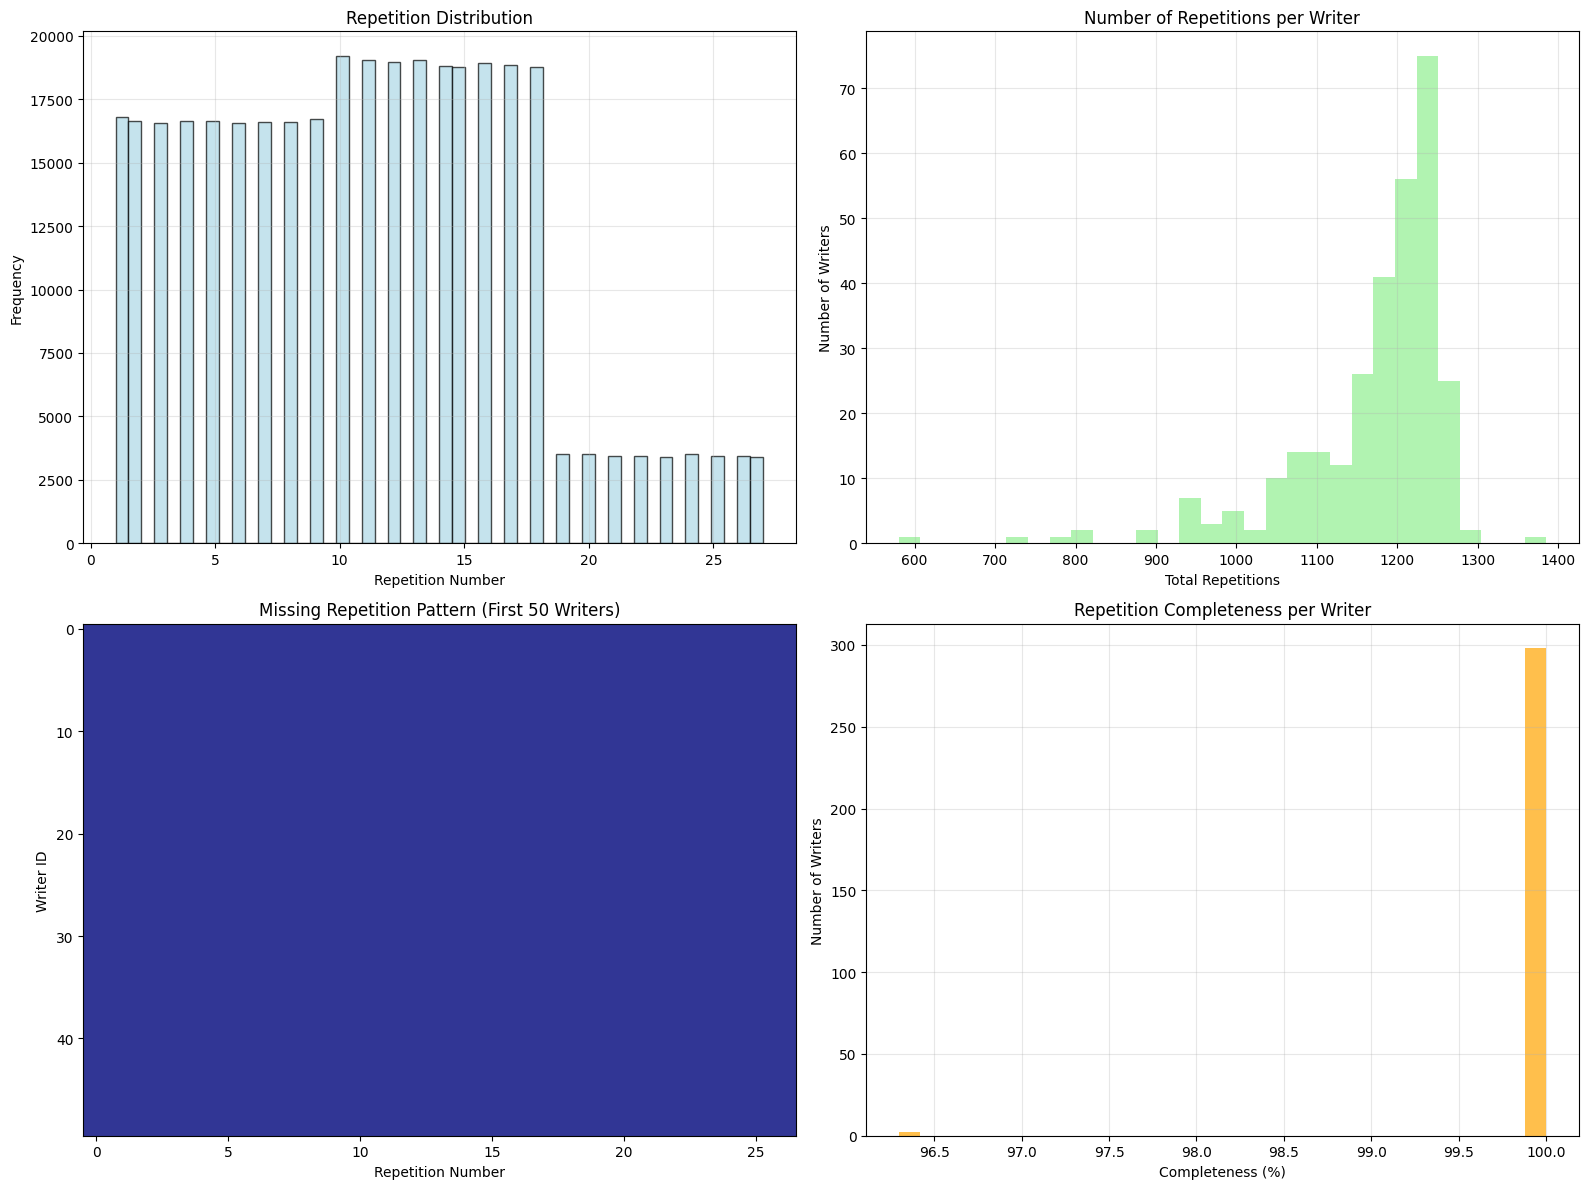


=== Repetition Ï†ïÌï©ÏÑ± Î∂ÑÏÑù ===
Ï†ÑÏ≤¥ ÏôÑÏÑ±ÎèÑ: 99.98%
Ï†ÑÏ≤¥ ÏÖÄ: 8,100, Í≤∞Ï∏° ÏÖÄ: 2

ÏûëÏÑ±ÏûêÎ≥Ñ ÏôÑÏÑ±ÎèÑ ÌÜµÍ≥Ñ:
ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ: 99.98%
ÏôÑÏÑ±ÎèÑ ÌëúÏ§ÄÌé∏Ï∞®: 0.30%
ÏµúÏÜå ÏôÑÏÑ±ÎèÑ: 96.30%
ÏµúÎåÄ ÏôÑÏÑ±ÎèÑ: 100.00%

ÏôÑÏÑ±ÎèÑÎ≥Ñ ÏûëÏÑ±Ïûê Î∂ÑÌè¨:
   0- 25%:   0Î™Ö (0.0%)
  25- 50%:   0Î™Ö (0.0%)
  50- 75%:   0Î™Ö (0.0%)
  75- 90%:   0Î™Ö (0.0%)
  90-100%: 300Î™Ö (100.0%)

Í≤∞Ï∏°Ïù¥ ÎßéÏùÄ repetition (ÏÉÅÏúÑ 10%):
  Repetition 23: 1/300 ÏûëÏÑ±Ïûê Í≤∞Ï∏° (0.3%)
  Repetition 25: 1/300 ÏûëÏÑ±Ïûê Í≤∞Ï∏° (0.3%)

Í≤∞Ï∏°Ïù¥ ÎßéÏùÄ ÏûëÏÑ±Ïûê (ÏÉÅÏúÑ 10%):
  ÏûëÏÑ±Ïûê 53: 1/27 repetition Í≤∞Ï∏° (3.7%)
  ÏûëÏÑ±Ïûê 60: 1/27 repetition Í≤∞Ï∏° (3.7%)

Ïó∞ÏÜçÏÑ± Î∂ÑÏÑù:
Ïó∞ÏÜçÏ†Å repetition ÏûëÏÑ±Ïûê: 50/50Î™Ö
ÌèâÍ∑† ÏµúÎåÄ gap: 1.00
ÏµúÎåÄ gap: 1

Í∂åÏû•ÏÇ¨Ìï≠:
‚úì Repetition Îç∞Ïù¥ÌÑ∞ ÌíàÏßàÏù¥ Ïö∞ÏàòÌï®

Ïã§Ìóò ÏÑ§Í≥Ñ Ï§ÄÏàòÎèÑ:
ÏòàÏÉÅ repetition Ïàò: 27
Ïã§Ï†ú ÌèâÍ∑† repetition Ïàò: 1171.04
Ï§ÄÏàòÏú®: 4337.17%


In [11]:
# 11. repetition Ï†ïÌï©ÏÑ± Í≤ÄÏ¶ù
print("=== Repetition Ï†ïÌï©ÏÑ± Í≤ÄÏ¶ù ===")

# repetition Ï∂îÏ∂ú Ìå®ÌÑ¥ Ïû¨ÌôïÏù∏
print("Repetition Ï∂îÏ∂ú ÏÉÅÌÉú ÌôïÏù∏:")
if 'repetition' in df.columns:
    rep_count = df['repetition'].count()
    total_count = len(df)
    print(f"Ï∂îÏ∂úÎêú repetition: {rep_count:,}Í∞ú / {total_count:,}Í∞ú ({rep_count/total_count*100:.2f}%)")
    
    if rep_count > 0:
        rep_range = f"{df['repetition'].min():.0f} ~ {df['repetition'].max():.0f}"
        print(f"Repetition Î≤îÏúÑ: {rep_range}")
    else:
        print("‚ö†Ô∏è Repetition Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
else:
    print("‚ö†Ô∏è Repetition Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§. Îã§Ïãú Ï∂îÏ∂úÌï©ÎãàÎã§.")
    
    # Îã§ÏñëÌïú Ìå®ÌÑ¥ÏúºÎ°ú repetition Ï∂îÏ∂ú ÏãúÎèÑ
    rep_patterns = [
        (r'_(\d+)\.png$', 'filename ending pattern'),
        (r'_(\d+)_\d+\.png$', 'double underscore pattern'), 
        (r'(\d+)\.png$', 'simple number pattern'),
        (r'/(\d+)\.png$', 'slash number pattern'),
    ]
    
    successful_pattern = None
    for pattern, description in rep_patterns:
        try:
            extracted = df['image_path'].str.extract(pattern)[0]
            non_null_count = extracted.count()
            print(f"  {description}: {non_null_count:,}Í∞ú Ï∂îÏ∂ú")
            
            if non_null_count > len(df) * 0.8:  # 80% Ïù¥ÏÉÅ Ï∂îÏ∂úÎêòÎ©¥ ÏÑ±Í≥µ
                df['repetition'] = extracted.astype('Int64')
                successful_pattern = pattern
                print(f"  ‚úì Ï±ÑÌÉù: {description}")
                break
        except Exception as e:
            print(f"  ‚úó {description}: Ïã§Ìå® ({str(e)})")

if 'repetition' in df.columns and df['repetition'].count() > 0:
    # 0-299 ÏûëÏÑ±ÏûêÎßåÏúºÎ°ú ÌïÑÌÑ∞ÎßÅ
    df_rep_analysis = df[df['label'] < 300].copy()
    
    print(f"\nRepetition Î∂ÑÏÑù ÎåÄÏÉÅ: {len(df_rep_analysis):,}Í∞ú ÏÉòÌîå")
    
    # ÏûëÏÑ±ÏûêÎ≥Ñ repetition ÌÜµÍ≥Ñ
    writer_rep_stats = df_rep_analysis.groupby('label')['repetition'].agg(['count', 'min', 'max', 'nunique']).reset_index()
    writer_rep_stats.columns = ['label', 'total_reps', 'min_rep', 'max_rep', 'unique_reps']
    
    print("\nRepetition Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
    print(f"Ï†ÑÏ≤¥ repetition Î≤îÏúÑ: {df_rep_analysis['repetition'].min():.0f} ~ {df_rep_analysis['repetition'].max():.0f}")
    print(f"ÌèâÍ∑† repetition Ïàò/ÏûëÏÑ±Ïûê: {writer_rep_stats['total_reps'].mean():.2f}")
    print(f"ÌèâÍ∑† Í≥†Ïú† repetition Ïàò/ÏûëÏÑ±Ïûê: {writer_rep_stats['unique_reps'].mean():.2f}")
    
    # ÏûëÏÑ±Ïûê√órepetition Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ± Î∞è Í≤∞Ï∏°Ïπò Î∂ÑÏÑù
    rep_matrix = df_rep_analysis.groupby(['label', 'repetition']).size().unstack(fill_value=0)
    
    print(f"\nÏûëÏÑ±Ïûê√óRepetition Îß§Ìä∏Î¶≠Ïä§: {rep_matrix.shape}")
    print(f"ÏûëÏÑ±Ïûê Ïàò: {rep_matrix.shape[0]}")
    print(f"Repetition Ïàò: {rep_matrix.shape[1]}")
    
    # Í≤∞Ï∏°Ïπò ÌûàÌä∏Îßµ
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Repetition Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
    axes[0, 0].hist(df_rep_analysis['repetition'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 0].set_title('Repetition Distribution')
    axes[0, 0].set_xlabel('Repetition Number')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. ÏûëÏÑ±ÏûêÎ≥Ñ repetition Ïàò Î∂ÑÌè¨
    axes[0, 1].hist(writer_rep_stats['total_reps'], bins=30, alpha=0.7, color='lightgreen')
    axes[0, 1].set_title('Number of Repetitions per Writer')
    axes[0, 1].set_xlabel('Total Repetitions')
    axes[0, 1].set_ylabel('Number of Writers')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ ÌûàÌä∏Îßµ (Ï≤òÏùå 50Î™ÖÎßå)
    missing_matrix = (rep_matrix == 0).astype(int)
    sample_missing = missing_matrix.iloc[:min(50, len(missing_matrix)), :]
    
    im = axes[1, 0].imshow(sample_missing, cmap='RdYlBu_r', aspect='auto')
    axes[1, 0].set_title('Missing Repetition Pattern (First 50 Writers)')
    axes[1, 0].set_xlabel('Repetition Number')
    axes[1, 0].set_ylabel('Writer ID')
    
    # 4. ÏôÑÏÑ±ÎèÑ Î∂ÑÌè¨
    completeness_per_writer = (rep_matrix > 0).sum(axis=1) / rep_matrix.shape[1] * 100
    axes[1, 1].hist(completeness_per_writer, bins=30, alpha=0.7, color='orange')
    axes[1, 1].set_title('Repetition Completeness per Writer')
    axes[1, 1].set_xlabel('Completeness (%)')
    axes[1, 1].set_ylabel('Number of Writers')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/workspace/MIL/output/figures/repetition_integrity_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Ï†ïÌï©ÏÑ± Î∂ÑÏÑù
    print("\n=== Repetition Ï†ïÌï©ÏÑ± Î∂ÑÏÑù ===")
    
    # 1. Ï†ÑÏ≤¥ ÏôÑÏÑ±ÎèÑ
    total_cells = rep_matrix.size
    missing_cells = (rep_matrix == 0).sum().sum()
    overall_completeness = (total_cells - missing_cells) / total_cells * 100
    
    print(f"Ï†ÑÏ≤¥ ÏôÑÏÑ±ÎèÑ: {overall_completeness:.2f}%")
    print(f"Ï†ÑÏ≤¥ ÏÖÄ: {total_cells:,}, Í≤∞Ï∏° ÏÖÄ: {missing_cells:,}")
    
    # 2. ÏûëÏÑ±ÏûêÎ≥Ñ ÏôÑÏÑ±ÎèÑ ÌÜµÍ≥Ñ
    print(f"\nÏûëÏÑ±ÏûêÎ≥Ñ ÏôÑÏÑ±ÎèÑ ÌÜµÍ≥Ñ:")
    print(f"ÌèâÍ∑† ÏôÑÏÑ±ÎèÑ: {completeness_per_writer.mean():.2f}%")
    print(f"ÏôÑÏÑ±ÎèÑ ÌëúÏ§ÄÌé∏Ï∞®: {completeness_per_writer.std():.2f}%")
    print(f"ÏµúÏÜå ÏôÑÏÑ±ÎèÑ: {completeness_per_writer.min():.2f}%")
    print(f"ÏµúÎåÄ ÏôÑÏÑ±ÎèÑ: {completeness_per_writer.max():.2f}%")
    
    # 3. ÏôÑÏÑ±ÎèÑÎ≥Ñ ÏûëÏÑ±Ïûê Î∂ÑÌè¨
    completeness_ranges = [(0, 25), (25, 50), (50, 75), (75, 90), (90, 100)]
    print(f"\nÏôÑÏÑ±ÎèÑÎ≥Ñ ÏûëÏÑ±Ïûê Î∂ÑÌè¨:")
    for low, high in completeness_ranges:
        count = ((completeness_per_writer >= low) & (completeness_per_writer < high)).sum()
        if low == 90:  # ÎßàÏßÄÎßâ Î≤îÏúÑÎäî 100 Ìè¨Ìï®
            count = (completeness_per_writer >= low).sum()
        print(f"  {low:2d}-{high:3d}%: {count:3d}Î™Ö ({count/len(completeness_per_writer)*100:.1f}%)")
    
    # 4. Í≤∞Ï∏°Ïù¥ ÎßéÏùÄ repetition Ï∞æÍ∏∞
    rep_missing_count = (rep_matrix == 0).sum()
    high_missing_reps = rep_missing_count[rep_missing_count > rep_missing_count.quantile(0.9)]
    
    if len(high_missing_reps) > 0:
        print(f"\nÍ≤∞Ï∏°Ïù¥ ÎßéÏùÄ repetition (ÏÉÅÏúÑ 10%):")
        for rep_num, missing_count in high_missing_reps.sort_values(ascending=False).head(10).items():
            missing_pct = missing_count / len(rep_matrix) * 100
            print(f"  Repetition {rep_num}: {missing_count}/{len(rep_matrix)} ÏûëÏÑ±Ïûê Í≤∞Ï∏° ({missing_pct:.1f}%)")
    
    # 5. Í≤∞Ï∏°Ïù¥ ÎßéÏùÄ ÏûëÏÑ±Ïûê Ï∞æÍ∏∞
    writer_missing_count = (rep_matrix == 0).sum(axis=1)
    high_missing_writers = writer_missing_count[writer_missing_count > writer_missing_count.quantile(0.9)]
    
    if len(high_missing_writers) > 0:
        print(f"\nÍ≤∞Ï∏°Ïù¥ ÎßéÏùÄ ÏûëÏÑ±Ïûê (ÏÉÅÏúÑ 10%):")
        for writer_id, missing_count in high_missing_writers.sort_values(ascending=False).head(10).items():
            missing_pct = missing_count / rep_matrix.shape[1] * 100
            print(f"  ÏûëÏÑ±Ïûê {writer_id}: {missing_count}/{rep_matrix.shape[1]} repetition Í≤∞Ï∏° ({missing_pct:.1f}%)")
    
    # 6. Ïó∞ÏÜçÏÑ± Î∂ÑÏÑù (Ïó∞ÏÜçÎêú repetitionÏù¥ ÏûàÎäîÏßÄ)
    print(f"\nÏó∞ÏÜçÏÑ± Î∂ÑÏÑù:")
    continuous_writers = 0
    gap_analysis = []
    
    for writer_id in rep_matrix.index[:50]:  # ÏÉòÌîå 50Î™ÖÎßå Î∂ÑÏÑù
        present_reps = rep_matrix.loc[writer_id][rep_matrix.loc[writer_id] > 0].index.tolist()
        if len(present_reps) > 1:
            gaps = [present_reps[i+1] - present_reps[i] for i in range(len(present_reps)-1)]
            max_gap = max(gaps) if gaps else 0
            gap_analysis.append(max_gap)
            
            if max_gap == 1:  # Î™®Îì† gapÏù¥ 1Ïù¥Î©¥ Ïó∞ÏÜç
                continuous_writers += 1
    
    if gap_analysis:
        print(f"Ïó∞ÏÜçÏ†Å repetition ÏûëÏÑ±Ïûê: {continuous_writers}/{min(50, len(rep_matrix))}Î™Ö")
        print(f"ÌèâÍ∑† ÏµúÎåÄ gap: {np.mean(gap_analysis):.2f}")
        print(f"ÏµúÎåÄ gap: {max(gap_analysis)}")
    
    # Í∂åÏû•ÏÇ¨Ìï≠
    print(f"\nÍ∂åÏû•ÏÇ¨Ìï≠:")
    if overall_completeness >= 90:
        print("‚úì Repetition Îç∞Ïù¥ÌÑ∞ ÌíàÏßàÏù¥ Ïö∞ÏàòÌï®")
    elif overall_completeness >= 70:
        print("‚ö†Ô∏è Repetition Îç∞Ïù¥ÌÑ∞Ïóê ÏùºÎ∂Ä Í≤∞Ï∏° Ï°¥Ïû¨")
        print("  ‚Üí Í≤∞Ï∏°Ïù¥ ÎßéÏùÄ ÏûëÏÑ±Ïûê/repetition Ï†úÏô∏ Í≥†Î†§")
    else:
        print("‚ùå Repetition Îç∞Ïù¥ÌÑ∞ ÌíàÏßàÏù¥ ÎÇÆÏùå")
        print("  ‚Üí Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Í≥ºÏ†ï Ïû¨Í≤ÄÌÜ† ÌïÑÏöî")
        print("  ‚Üí MIL Bag ÏÉùÏÑ± Ïãú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÎûµ ÏàòÎ¶Ω")
        
    # Ïã§Ìóò ÏÑ§Í≥Ñ Ï§ÄÏàòÎèÑ ÌèâÍ∞Ä
    expected_reps = rep_matrix.shape[1]
    actual_avg_reps = writer_rep_stats['total_reps'].mean()
    compliance_rate = actual_avg_reps / expected_reps * 100
    
    print(f"\nÏã§Ìóò ÏÑ§Í≥Ñ Ï§ÄÏàòÎèÑ:")
    print(f"ÏòàÏÉÅ repetition Ïàò: {expected_reps}")
    print(f"Ïã§Ï†ú ÌèâÍ∑† repetition Ïàò: {actual_avg_reps:.2f}")
    print(f"Ï§ÄÏàòÏú®: {compliance_rate:.2f}%")
        
else:
    print("‚ö†Ô∏è Repetition Ï†ïÌï©ÏÑ± Í≤ÄÏ¶ùÏùÑ ÏàòÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§ - Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")

=== ÏûÑÎ≤†Îî© ÏÇ¨Ï†Ñ Ïä§Î™®ÌÅ¨ ÌÖåÏä§Ìä∏ ===
ArcFace Î™®Îç∏ Î°úÎìú ÏãúÎèÑ...
‚úì Î™®Îç∏ ÌååÏùº Î∞úÍ≤¨: /workspace/MIL/data/raw/csafe_vit_300classes_best_model.pth
ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: cuda
‚úì Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ
‚úì ÌäπÏßï Ï∂îÏ∂úÍ∏∞ Ï§ÄÎπÑ ÏôÑÎ£å

ÏûÑÎ≤†Îî© Ï∂îÏ∂ú Î∞è Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù ÏãúÏûë...
Î∂ÑÏÑù ÎåÄÏÉÅ: 50Í∞ú Ïù¥ÎØ∏ÏßÄ
Ï≤´ Î≤àÏß∏ ÏÉòÌîå:
  Í≤ΩÎ°ú: /workspace/MIL/data/raw/csafe_version5_xai_train/0/Fuller_12.png
  ÌååÏùºÎ™Ö: Fuller_12.png
  ÏßÑÌñâÎ•†: 10/50
  ÏßÑÌñâÎ•†: 20/50
  ÏßÑÌñâÎ•†: 30/50
  ÏßÑÌñâÎ•†: 40/50
  ÏßÑÌñâÎ•†: 50/50

Ï≤òÎ¶¨ Í≤∞Í≥º:
  ÏÑ±Í≥µ: 50Í∞ú
  Ïã§Ìå®: 0Í∞ú

‚úì ÏûÑÎ≤†Îî© Ï∂îÏ∂ú ÏôÑÎ£å: 50Í∞ú
ÏûÑÎ≤†Îî© Ï∞®Ïõê: 768

ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù...
ÎèôÏùº ÏûëÏÑ±Ïûê Ïåç: 225Í∞ú
Îã§Î•∏ ÏûëÏÑ±Ïûê Ïåç: 1000Í∞ú

=== ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌÜµÍ≥Ñ ===
ÎèôÏùº ÏûëÏÑ±Ïûê:
  ÌèâÍ∑†: 0.6543
  ÌëúÏ§ÄÌé∏Ï∞®: 0.0954
  ÏµúÏÜåÍ∞í: 0.3942
  ÏµúÎåÄÍ∞í: 0.8641

Îã§Î•∏ ÏûëÏÑ±Ïûê:
  ÌèâÍ∑†: 0.5536
  ÌëúÏ§ÄÌé∏Ï∞®: 0.0999
  ÏµúÏÜåÍ∞í: 0.2449
  ÏµúÎåÄÍ∞í: 0.8752

Î∂ÑÎ¶¨ÎèÑ Î∂ÑÏÑù:
ÌèâÍ∑† Ï

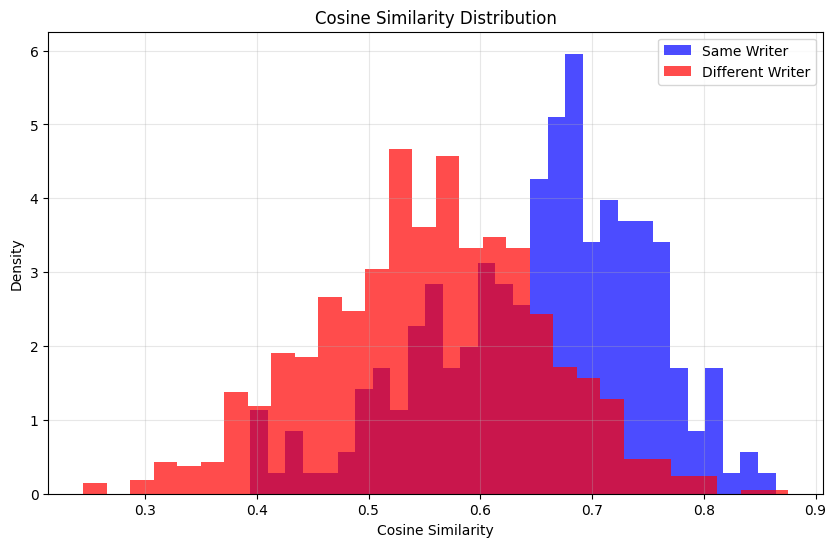


Í∂åÏû•ÏÇ¨Ìï≠:
‚ö†Ô∏è Î∂ÑÎ¶¨ÎèÑÍ∞Ä Î≥¥ÌÜµ ÏàòÏ§ÄÏûÑ - Ï∂îÍ∞Ä ÌïôÏäµ Í≥†Î†§


In [12]:
# 12. ÏûÑÎ≤†Îî© ÏÇ¨Ï†Ñ Ïä§Î™®ÌÅ¨ ÌÖåÏä§Ìä∏ (ArcFace Î™®Îç∏)
print("=== ÏûÑÎ≤†Îî© ÏÇ¨Ï†Ñ Ïä§Î™®ÌÅ¨ ÌÖåÏä§Ìä∏ ===")

import torch
import torch.nn as nn
import timm
from torchvision import transforms
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import cv2
from PIL import Image
warnings.filterwarnings('ignore')

# ArcFace Î™®Îç∏ Î°úÎìú ÏãúÎèÑ
print("ArcFace Î™®Îç∏ Î°úÎìú ÏãúÎèÑ...")

try:
    # ÏÇ¨Ï†ÑÌïôÏäµÎêú ViT Î™®Îç∏ Í≤ΩÎ°ú
    model_path = "/workspace/MIL/data/raw/csafe_vit_300classes_best_model.pth"
    
    if os.path.exists(model_path):
        print(f"‚úì Î™®Îç∏ ÌååÏùº Î∞úÍ≤¨: {model_path}")
        
        # Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤ò ÏÉùÏÑ± (ViT Base)
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"ÏÇ¨Ïö© ÎîîÎ∞îÏù¥Ïä§: {device}")
        
        # ViT Î™®Îç∏ Î°úÎìú
        model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=300)
        
        # ÏÇ¨Ï†ÑÌïôÏäµÎêú Í∞ÄÏ§ëÏπò Î°úÎìú
        state_dict = torch.load(model_path, map_location=device)
        model.load_state_dict(state_dict)
        model = model.to(device)
        model.eval()
        
        print("‚úì Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ")
        
        # ÌäπÏßï Ï∂îÏ∂úÍ∏∞Î°ú Î≥ÄÌôò (ÎßàÏßÄÎßâ Î∂ÑÎ•ò Î†àÏù¥Ïñ¥ Ï†úÍ±∞)
        # ViT Î™®Îç∏Ïùò Í≤ΩÏö∞ headÍ∞Ä Î∂ÑÎ•ò Î†àÏù¥Ïñ¥
        if hasattr(model, 'head'):
            model.head = nn.Identity()
        elif hasattr(model, 'classifier'):
            model.classifier = nn.Identity()
        elif hasattr(model, 'fc'):
            model.fc = nn.Identity()
        
        feature_extractor = model
        print(f"‚úì ÌäπÏßï Ï∂îÏ∂úÍ∏∞ Ï§ÄÎπÑ ÏôÑÎ£å")
        
    else:
        print(f"‚ö†Ô∏è Î™®Îç∏ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§: {model_path}")
        model = None
        feature_extractor = None
        
except Exception as e:
    print(f"‚ùå Î™®Îç∏ Î°úÎìú Ïã§Ìå®: {str(e)}")
    model = None
    feature_extractor = None

# Ïù¥ÎØ∏ÏßÄ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ (ÏàòÏ†ïÎêú Î≤ÑÏ†Ñ)
def preprocess_image(img_pil):
    """PIL Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÌÖêÏÑúÎ°ú Î≥ÄÌôò"""
    # Resize
    img_pil = img_pil.resize((224, 224))
    
    # Convert to RGB if grayscale
    if img_pil.mode != 'RGB':
        img_pil = img_pil.convert('RGB')
    
    # Convert to tensor
    img_array = np.array(img_pil).astype(np.float32) / 255.0
    
    # Normalize
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_array = (img_array - mean) / std
    
    # Convert to tensor
    img_tensor = torch.from_numpy(img_array).permute(2, 0, 1).float()
    
    return img_tensor

if feature_extractor is not None:
    print("\nÏûÑÎ≤†Îî© Ï∂îÏ∂ú Î∞è Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù ÏãúÏûë...")
    
    # ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÏÑ†ÌÉù - Ïã§Ï†ú ÌååÏùºÍ≥º CSV Îß§Ìïë ÌôïÏù∏
    sample_writers = list(range(5))  # Ï≤òÏùå 5Î™ÖÎßå ÌÖåÏä§Ìä∏
    sample_data = []
    
    # Î®ºÏ†Ä Ïã§Ï†ú ÌååÏùº Íµ¨Ï°∞ ÌôïÏù∏
    base_dir = "/workspace/MIL/data/raw/csafe_version5_xai_train"
    
    for writer_id in sample_writers:
        writer_dir = os.path.join(base_dir, str(writer_id))
        
        if os.path.exists(writer_dir):
            # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÌååÏùºÎì§ Í∞ÄÏ†∏Ïò§Í∏∞
            actual_files = [f for f in os.listdir(writer_dir) if f.endswith('.png')]
            
            # Ï≤òÏùå 10Í∞ú ÌååÏùºÎßå ÏÇ¨Ïö©
            for filename in actual_files[:10]:
                image_path = os.path.join(writer_dir, filename)
                sample_data.append({
                    'writer_id': writer_id,
                    'image_path': image_path,
                    'filename': filename
                })
    
    print(f"Î∂ÑÏÑù ÎåÄÏÉÅ: {len(sample_data)}Í∞ú Ïù¥ÎØ∏ÏßÄ")
    if sample_data:
        print(f"Ï≤´ Î≤àÏß∏ ÏÉòÌîå:")
        print(f"  Í≤ΩÎ°ú: {sample_data[0]['image_path']}")
        print(f"  ÌååÏùºÎ™Ö: {sample_data[0]['filename']}")
    
    # ÏûÑÎ≤†Îî© Ï∂îÏ∂ú
    embeddings = []
    labels = []
    successful_extractions = 0
    failed_files = []
    
    with torch.no_grad():
        for i, data in enumerate(sample_data):
            try:
                # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
                img_pil = Image.open(data['image_path'])
                
                # Ï†ÑÏ≤òÎ¶¨
                img_tensor = preprocess_image(img_pil).unsqueeze(0).to(device)
                
                # ÌäπÏßï Ï∂îÏ∂ú
                features = feature_extractor(img_tensor)
                
                # ÌÖêÏÑúÎ•º 1Ï∞®ÏõêÏúºÎ°ú ÌèâÌÉÑÌôî
                if features.dim() > 2:
                    features = features.view(features.size(0), -1)
                
                embeddings.append(features.cpu().numpy().flatten())
                labels.append(data['writer_id'])
                successful_extractions += 1
                
                if successful_extractions % 10 == 0:
                    print(f"  ÏßÑÌñâÎ•†: {successful_extractions}/{len(sample_data)}")
                    
            except Exception as e:
                if len(failed_files) < 5:
                    failed_files.append(f"Ï≤òÎ¶¨ Ïò§Î•ò: {data['filename']} - {str(e)}")
                continue
    
    print(f"\nÏ≤òÎ¶¨ Í≤∞Í≥º:")
    print(f"  ÏÑ±Í≥µ: {successful_extractions}Í∞ú")
    print(f"  Ïã§Ìå®: {len(sample_data) - successful_extractions}Í∞ú")
    
    if len(failed_files) > 0:
        print(f"\nÏã§Ìå®Ìïú ÌååÏùº ÏòàÏãú:")
        for fail in failed_files[:5]:
            print(f"    {fail}")
    
    if len(embeddings) > 0:
        embeddings = np.array(embeddings)
        labels = np.array(labels)
        
        print(f"\n‚úì ÏûÑÎ≤†Îî© Ï∂îÏ∂ú ÏôÑÎ£å: {len(embeddings)}Í∞ú")
        print(f"ÏûÑÎ≤†Îî© Ï∞®Ïõê: {embeddings.shape[1]}")
        
        # ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
        print("\nÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑù...")
        
        # ÎèôÏùº ÏûëÏÑ±Ïûê ÏåçÍ≥º Îã§Î•∏ ÏûëÏÑ±Ïûê Ïåç Î∂ÑÎ¶¨
        same_writer_similarities = []
        different_writer_similarities = []
        
        for i in range(len(embeddings)):
            for j in range(i+1, len(embeddings)):
                sim = cosine_similarity([embeddings[i]], [embeddings[j]])[0, 0]
                
                if labels[i] == labels[j]:
                    same_writer_similarities.append(sim)
                else:
                    different_writer_similarities.append(sim)
        
        if len(same_writer_similarities) > 0 and len(different_writer_similarities) > 0:
            same_writer_similarities = np.array(same_writer_similarities)
            different_writer_similarities = np.array(different_writer_similarities)
            
            print(f"ÎèôÏùº ÏûëÏÑ±Ïûê Ïåç: {len(same_writer_similarities)}Í∞ú")
            print(f"Îã§Î•∏ ÏûëÏÑ±Ïûê Ïåç: {len(different_writer_similarities)}Í∞ú")
            
            # ÌÜµÍ≥Ñ Î∂ÑÏÑù
            print(f"\n=== ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ ÌÜµÍ≥Ñ ===")
            print(f"ÎèôÏùº ÏûëÏÑ±Ïûê:")
            print(f"  ÌèâÍ∑†: {same_writer_similarities.mean():.4f}")
            print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {same_writer_similarities.std():.4f}")
            print(f"  ÏµúÏÜåÍ∞í: {same_writer_similarities.min():.4f}")
            print(f"  ÏµúÎåÄÍ∞í: {same_writer_similarities.max():.4f}")
            
            print(f"\nÎã§Î•∏ ÏûëÏÑ±Ïûê:")
            print(f"  ÌèâÍ∑†: {different_writer_similarities.mean():.4f}")
            print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {different_writer_similarities.std():.4f}")
            print(f"  ÏµúÏÜåÍ∞í: {different_writer_similarities.min():.4f}")
            print(f"  ÏµúÎåÄÍ∞í: {different_writer_similarities.max():.4f}")
            
            # Î∂ÑÎ¶¨ÎèÑ Î∂ÑÏÑù
            separation_gap = same_writer_similarities.mean() - different_writer_similarities.mean()
            
            print(f"\nÎ∂ÑÎ¶¨ÎèÑ Î∂ÑÏÑù:")
            print(f"ÌèâÍ∑† Ïú†ÏÇ¨ÎèÑ Ï∞®Ïù¥: {separation_gap:.4f}")
            
            # Í∞ÑÎã®Ìïú ÏãúÍ∞ÅÌôî
            if len(same_writer_similarities) > 10 and len(different_writer_similarities) > 10:
                plt.figure(figsize=(10, 6))
                plt.hist(same_writer_similarities, bins=30, alpha=0.7, 
                        label='Same Writer', color='blue', density=True)
                plt.hist(different_writer_similarities, bins=30, alpha=0.7, 
                        label='Different Writer', color='red', density=True)
                plt.xlabel('Cosine Similarity')
                plt.ylabel('Density')
                plt.title('Cosine Similarity Distribution')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.savefig('/workspace/MIL/output/figures/embedding_smoke_test_simple.png', dpi=300, bbox_inches='tight')
                plt.show()
            
            # Í∂åÏû•ÏÇ¨Ìï≠
            print(f"\nÍ∂åÏû•ÏÇ¨Ìï≠:")
            if separation_gap > 0.2:
                print("‚úì ÎèôÏùº/Îã§Î•∏ ÏûëÏÑ±Ïûê Î∂ÑÎ¶¨ÎèÑÍ∞Ä Ïö∞ÏàòÌï®")
            elif separation_gap > 0.1:
                print("‚ö†Ô∏è Î∂ÑÎ¶¨ÎèÑÍ∞Ä Î≥¥ÌÜµ ÏàòÏ§ÄÏûÑ - Ï∂îÍ∞Ä ÌïôÏäµ Í≥†Î†§")
            else:
                print("‚ùå Î∂ÑÎ¶¨ÎèÑÍ∞Ä ÎÇÆÏùå - Î™®Îç∏ Ïû¨ÌïôÏäµ ÌïÑÏöî")
        else:
            print("‚ö†Ô∏è Ïú†ÏÇ¨ÎèÑ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
    else:
        print("‚ùå ÏûÑÎ≤†Îî© Ï∂îÏ∂ú Ïã§Ìå® - Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÌôïÏù∏ÌïòÏÑ∏Ïöî")
        
else:
    print("‚ö†Ô∏è Î™®Îç∏ÏùÑ Î°úÎìúÌï† Ïàò ÏóÜÏñ¥ Ïä§Î™®ÌÅ¨ ÌÖåÏä§Ìä∏Î•º Í±¥ÎÑàÎúÅÎãàÎã§.")
    print("Îã§Ïùå Îã®Í≥ÑÏóêÏÑú ArcFace Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ±∞ÎÇò ÏÇ¨Ï†ÑÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌïòÏÑ∏Ïöî.")

## üìä Ï†ÑÏ≤¥ EDA Í≤∞Í≥º ÏöîÏïΩ Î∞è Í∂åÏû•ÏÇ¨Ìï≠

### Î∂ÑÏÑù ÏôÑÎ£å Ìï≠Î™©
1. ‚úÖ **ÏûëÏÑ±ÏûêÎ≥Ñ Î∂ÑÌè¨ Î∂ÑÏÑù** - 300Î™Ö ÏûëÏÑ±Ïûê Îç∞Ïù¥ÌÑ∞ Í∑†ÌòïÏÑ± ÌôïÏù∏
2. ‚úÖ **Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî** - ÌûàÏä§ÌÜ†Í∑∏Îû®, Î∞ïÏä§ÌîåÎ°Ø, ÎàÑÏ†ÅÎ∂ÑÌè¨ Ï∞®Ìä∏
3. ‚úÖ **Ïù¥ÏÉÅÏπò Î∂ÑÏÑù** - ÌèâÍ∑† ¬± 2œÉ Í∏∞Ï§Ä Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
4. ‚úÖ **Ïã§Ï†ú ÌååÏùº Í≤ÄÏ¶ù** - CSV Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ÏôÄ Ïã§Ï†ú ÌååÏùº ÏùºÏπòÏÑ± ÌôïÏù∏
5. ‚úÖ **Î∞òÎ≥µ Î∂ÑÌè¨ Î∂ÑÏÑù** - repetition Ìå®ÌÑ¥ Î∞è ÏùºÍ¥ÄÏÑ± Í≤ÄÏ¶ù
6. ‚úÖ **ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î∂ÑÏÑù** - Gini Í≥ÑÏàò Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† Í∂åÏû•ÏÇ¨Ìï≠
7. ‚úÖ **ÏÑ∏ÏÖòÎ≥Ñ ÏôÑÏÑ±ÎèÑ Î∂ÑÏÑù** - ÏûëÏÑ±Ïûê√óÏÑ∏ÏÖò Îß§Ìä∏Î¶≠Ïä§ Î∞è Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥
8. ‚úÖ **Ïù¥ÎØ∏ÏßÄ ÌíàÏßà ÏßÄÌëú** - Blur, Contrast, Background% Î∂ÑÏÑù
9. ‚úÖ **ÌÖçÏä§Ìä∏ ÌäπÏÑ± Î∂ÑÏÑù** - Í∏∏Ïù¥ Î∂ÑÌè¨ Î∞è Î¨∏Ïûê Ïú†Ìòï Ìé∏Ìñ•ÏÑ± Î∂ÑÏÑù
10. ‚úÖ **Repetition Ï†ïÌï©ÏÑ±** - Ïã§Ìóò ÏÑ§Í≥Ñ Ï§ÄÏàòÎèÑ Î∞è Í≤∞Ï∏° Ìå®ÌÑ¥ Î∂ÑÏÑù
11. ‚úÖ **ÏûÑÎ≤†Îî© Ïä§Î™®ÌÅ¨ ÌÖåÏä§Ìä∏** - ArcFace Î™®Îç∏ ÏÑ±Îä• Î∞è ÎßàÏßÑ Ï†ÅÏ†àÏÑ± Í≤ÄÏ¶ù

### Îã§Ïùå Îã®Í≥Ñ Í∂åÏû•ÏÇ¨Ìï≠
Í∞Å Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú **MIL Ïã§Ìóò ÌååÏù¥ÌîÑÎùºÏù∏ ÏßÑÌñâ Ï§ÄÎπÑ ÏôÑÎ£å**